<a href="https://colab.research.google.com/github/npjordan1469/capos-domain/blob/main/CEE21_Final_Project_Massachussets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# REMINDER THAT IF YOU ARE USING THIS NOTEBOOK, YOU NEED TO:
# 1. Make sure the shared folder file is in your drive (and not put into another folder)
# 2. Run every line of code except for the plots, to import the data, cutting the outlier data, splitting for training, and running the ML models
# 3. Our starting date for the data is 5/19/2020, and our end date is 5/19/2025
# 4. Run code in respective order, there are portions where previous code gets overwritten by new code

In [ ]:
# Mounting drive & importing libraries
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Mounted at /content/drive


In [ ]:
# Uploading feature data into dataframe, does not include the DSCHRG data
try:
    df = pd.read_csv('/content/drive/MyDrive/CEE21 Final Project/newatmosphericdata3.csv', encoding='latin-1')
except UnicodeDecodeError:
    try:
        print("unicodedecodeerror")
        df = pd.read_csv('/content/drive/MyDrive/CEE21 Final Project/newatmosphericdata3.csv', encoding='cp1252')
    except UnicodeDecodeError:
        print("Could not decode with 'latin-1' or 'cp1252'. Please check the file's encoding.")
df

YEAR  DAY NUMBER  DOY  PRECTOTCORR  GWETTOP  T2M_MAX  T2M_MIN    T2M  \
0     2020           1  140         0.00     0.79    11.73     7.38   9.47   
1     2020           2  141         0.00     0.78    12.84     6.83   9.79   
2     2020           3  142         0.00     0.78    16.79     6.21  11.52   
3     2020           4  143         0.02     0.77    19.90     9.50  15.07   
4     2020           5  144         7.68     0.79    14.94     8.42  11.69   
...    ...         ...  ...          ...      ...      ...      ...    ...   
1818  2025        1819  132         0.00     0.41    16.52     9.12  13.31   
1819  2025        1820  133         0.00     0.38    15.82    10.65  13.31   
1820  2025        1821  134         0.00     0.38    19.09    10.21  14.50   
1821  2025        1822  135         0.51     0.38    19.31    12.15  15.53   
1822  2025        1823  136         0.22     0.39    22.21    13.60  17.22   

       RH2M   QV2M      PS  DSCHRG  
0     80.66   5.77  102.55  32.3    
1     73.82   5.32  102.98  29.6    
2     74.76   6.06  102.59  25.8    
3     80.12   8.36  101.77  23.8    
4     87.42   7.58  101.82  22.2    
...     ...    ...     ...     ...  
1818  63.88   5.90  102.24  47.2    
1819  78.01   7.21  102.22  34.7    
1820  80.98   8.08  101.94  27.9    
1821  90.03   9.85  101.16  25.9    
1822  85.68  10.37  100.56  25.1    

[1823 rows x 12 columns]

In [ ]:
# Uploads the target DSCHRG data and merges with the prior pandas table
try:
    df2 = pd.read_csv('/content/drive/MyDrive/CEE21 Final Project/DSCHRG.csv', encoding='latin-1')
except UnicodeDecodeError:
    try:
        print("unicodedecodeerror")
        df2 = pd.read_csv('/content/drive/MyDrive/CEE21 Final Project/DSCHRG.csv', encoding='cp1252')
    except UnicodeDecodeError:
        print("Could not decode with 'latin-1' or 'cp1252'. Please check the file's encoding.")
assign = df2.Discharge
df['DSCHRG'] = assign

In [ ]:
# Computing summary statistics
tabular_features = ["PRECTOTCORR", "GWETTOP", "T2M_MAX", "T2M_MIN", "T2M", "RH2M", "QV2M", "PS", "DSCHRG"]
df[tabular_features].describe()

PRECTOTCORR      GWETTOP      T2M_MAX      T2M_MIN          T2M  \
count  1823.000000  1823.000000  1823.000000  1823.000000  1823.000000   
mean      3.255398     0.669989    14.567126     8.419863    11.433379   
std       7.421121     0.148728     8.777208     8.282852     8.360010   
min       0.000000     0.350000    -6.970000   -18.540000    -9.620000   
25%       0.010000     0.560000     7.355000     1.500000     4.375000   
50%       0.190000     0.690000    14.480000     8.080000    11.250000   
75%       2.705000     0.800000    22.210000    15.770000    18.835000   
max      86.990000     0.920000    32.870000    24.240000    28.050000   

              RH2M         QV2M           PS       DSCHRG  
count  1823.000000  1823.000000  1823.000000  1823.000000  
mean     80.505650     7.543346   101.434465    26.834942  
std       8.922929     3.935538     0.764461    29.425327  
min      52.620000     1.400000    98.760000     0.000000  
25%      74.060000     4.190000   100.965000     8.605000  
50%      80.700000     6.600000   101.420000    19.100000  
75%      87.585000    10.595000   101.935000    33.000000  
max      99.560000    17.110000   104.380000   234.000000

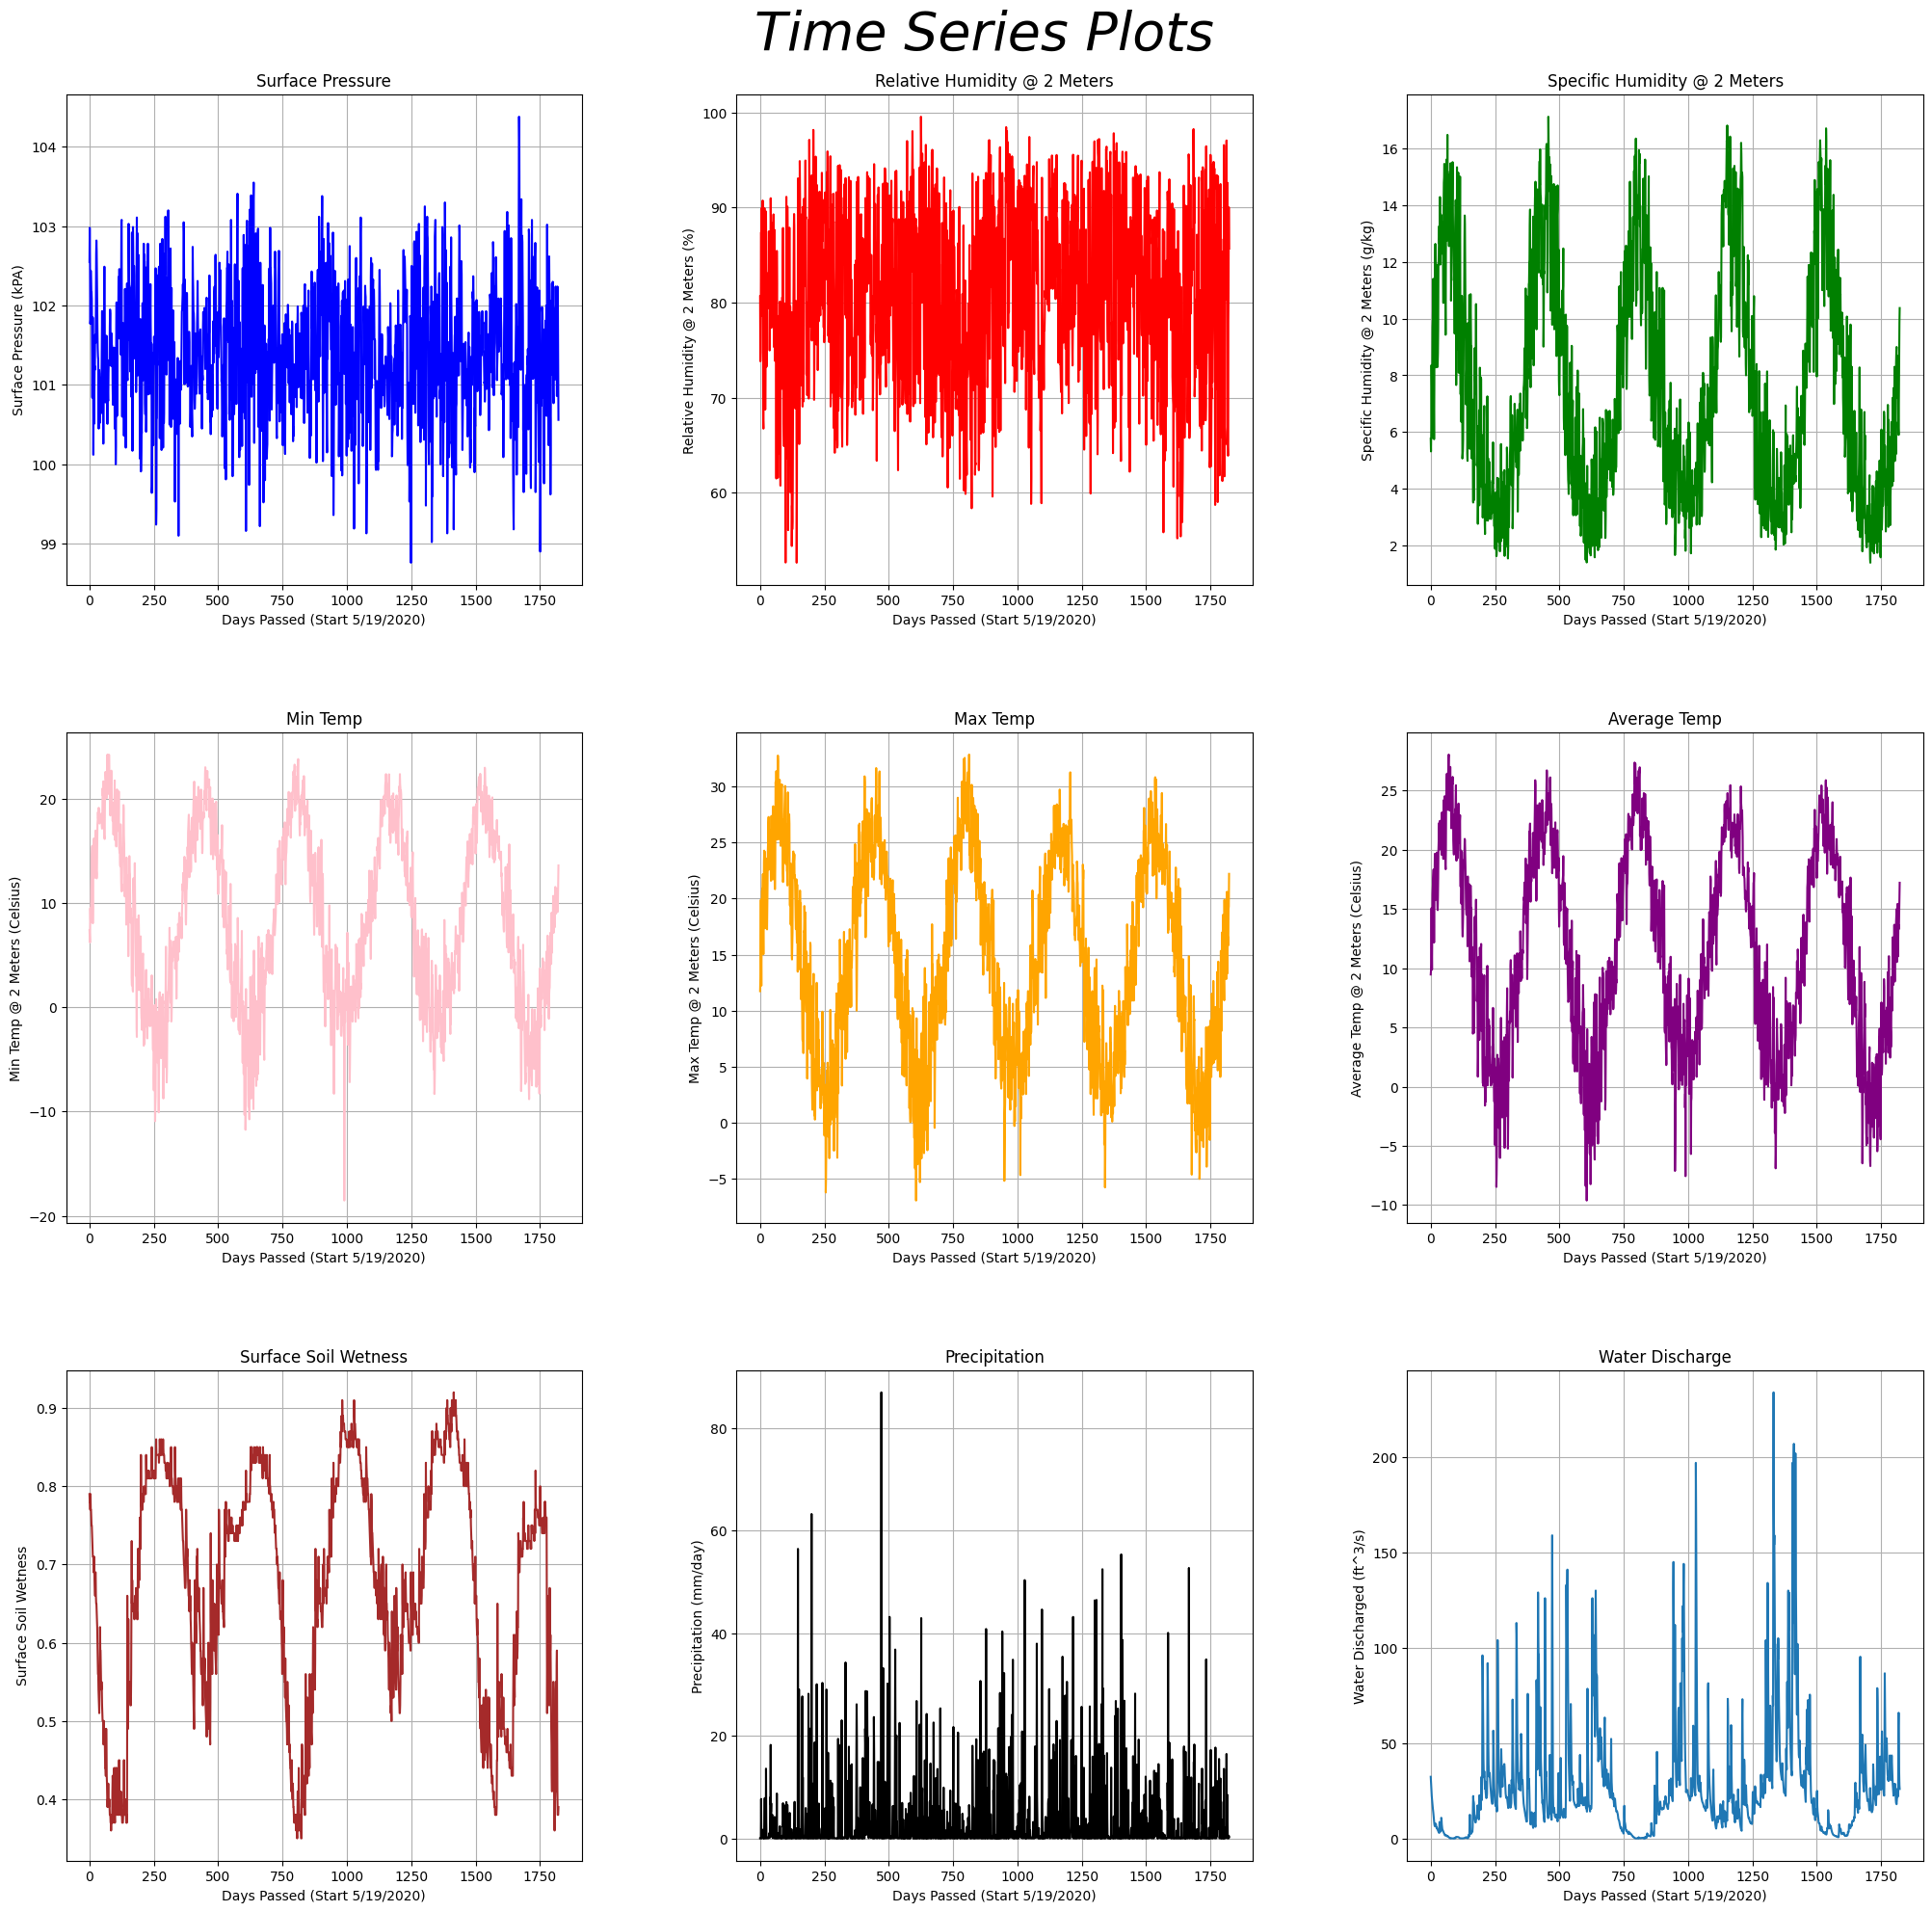

In [ ]:
# Plotting time series plots of data in a subplot for easy of screenshotting
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle("Time Series Plots", fontsize = 40, fontstyle='italic')
plt.tight_layout(rect=[0, 0, 1, 0.98])
fig.subplots_adjust(hspace=0.3, wspace=0.3)  # hspace = height, wspace = width
df['PS'].plot(ax=axs[0, 0], title='Surface Pressure', color = 'blue')
axs[0,0].set_xlabel("Days Passed (Start 5/19/2020)")
axs[0,0].set_ylabel("Surface Pressure (kPA)")
axs[0,0].grid()
df['RH2M'].plot(ax=axs[0, 1], title='Relative Humidity @ 2 Meters', color = 'red')
axs[0,1].set_xlabel("Days Passed (Start 5/19/2020)")
axs[0,1].set_ylabel("Relative Humidity @ 2 Meters (%)")
axs[0,1].grid()
df['QV2M'].plot(ax=axs[0, 2], title='Specific Humidity @ 2 Meters', color = 'green')
axs[0,2].set_xlabel("Days Passed (Start 5/19/2020)")
axs[0,2].set_ylabel("Specific Humidity @ 2 Meters (g/kg)")
axs[0,2].grid()
df['T2M_MIN'].plot(ax=axs[1, 0], title='Min Temp', color = 'pink')
axs[1,0].set_xlabel("Days Passed (Start 5/19/2020)")
axs[1,0].set_ylabel("Min Temp @ 2 Meters (Celsius)")
axs[1,0].grid()
df['T2M_MAX'].plot(ax=axs[1, 1], title='Max Temp', color = 'orange')
axs[1,1].set_xlabel("Days Passed (Start 5/19/2020)")
axs[1,1].set_ylabel("Max Temp @ 2 Meters (Celsius)")
axs[1,1].grid()
df['T2M'].plot(ax=axs[1, 2], title='Average Temp', color = 'purple')
axs[1,2].set_xlabel("Days Passed (Start 5/19/2020)")
axs[1,2].set_ylabel("Average Temp @ 2 Meters (Celsius)")
axs[1,2].grid()
df['GWETTOP'].plot(ax=axs[2, 0], title='Surface Soil Wetness', color = 'brown')
axs[2,0].set_xlabel("Days Passed (Start 5/19/2020)")
axs[2,0].set_ylabel("Surface Soil Wetness")
axs[2,0].grid()
df['PRECTOTCORR'].plot(ax=axs[2, 1], title='Precipitation', color = 'black')
axs[2,1].set_xlabel("Days Passed (Start 5/19/2020)")
axs[2,1].set_ylabel("Precipitation (mm/day)")
axs[2,1].grid()
df['DSCHRG'].plot(ax=axs[2, 2], title='Water Discharge')
axs[2,2].set_xlabel("Days Passed (Start 5/19/2020)")
axs[2,2].set_ylabel("Water Discharged (ft^3/s)")
axs[2,2].grid()

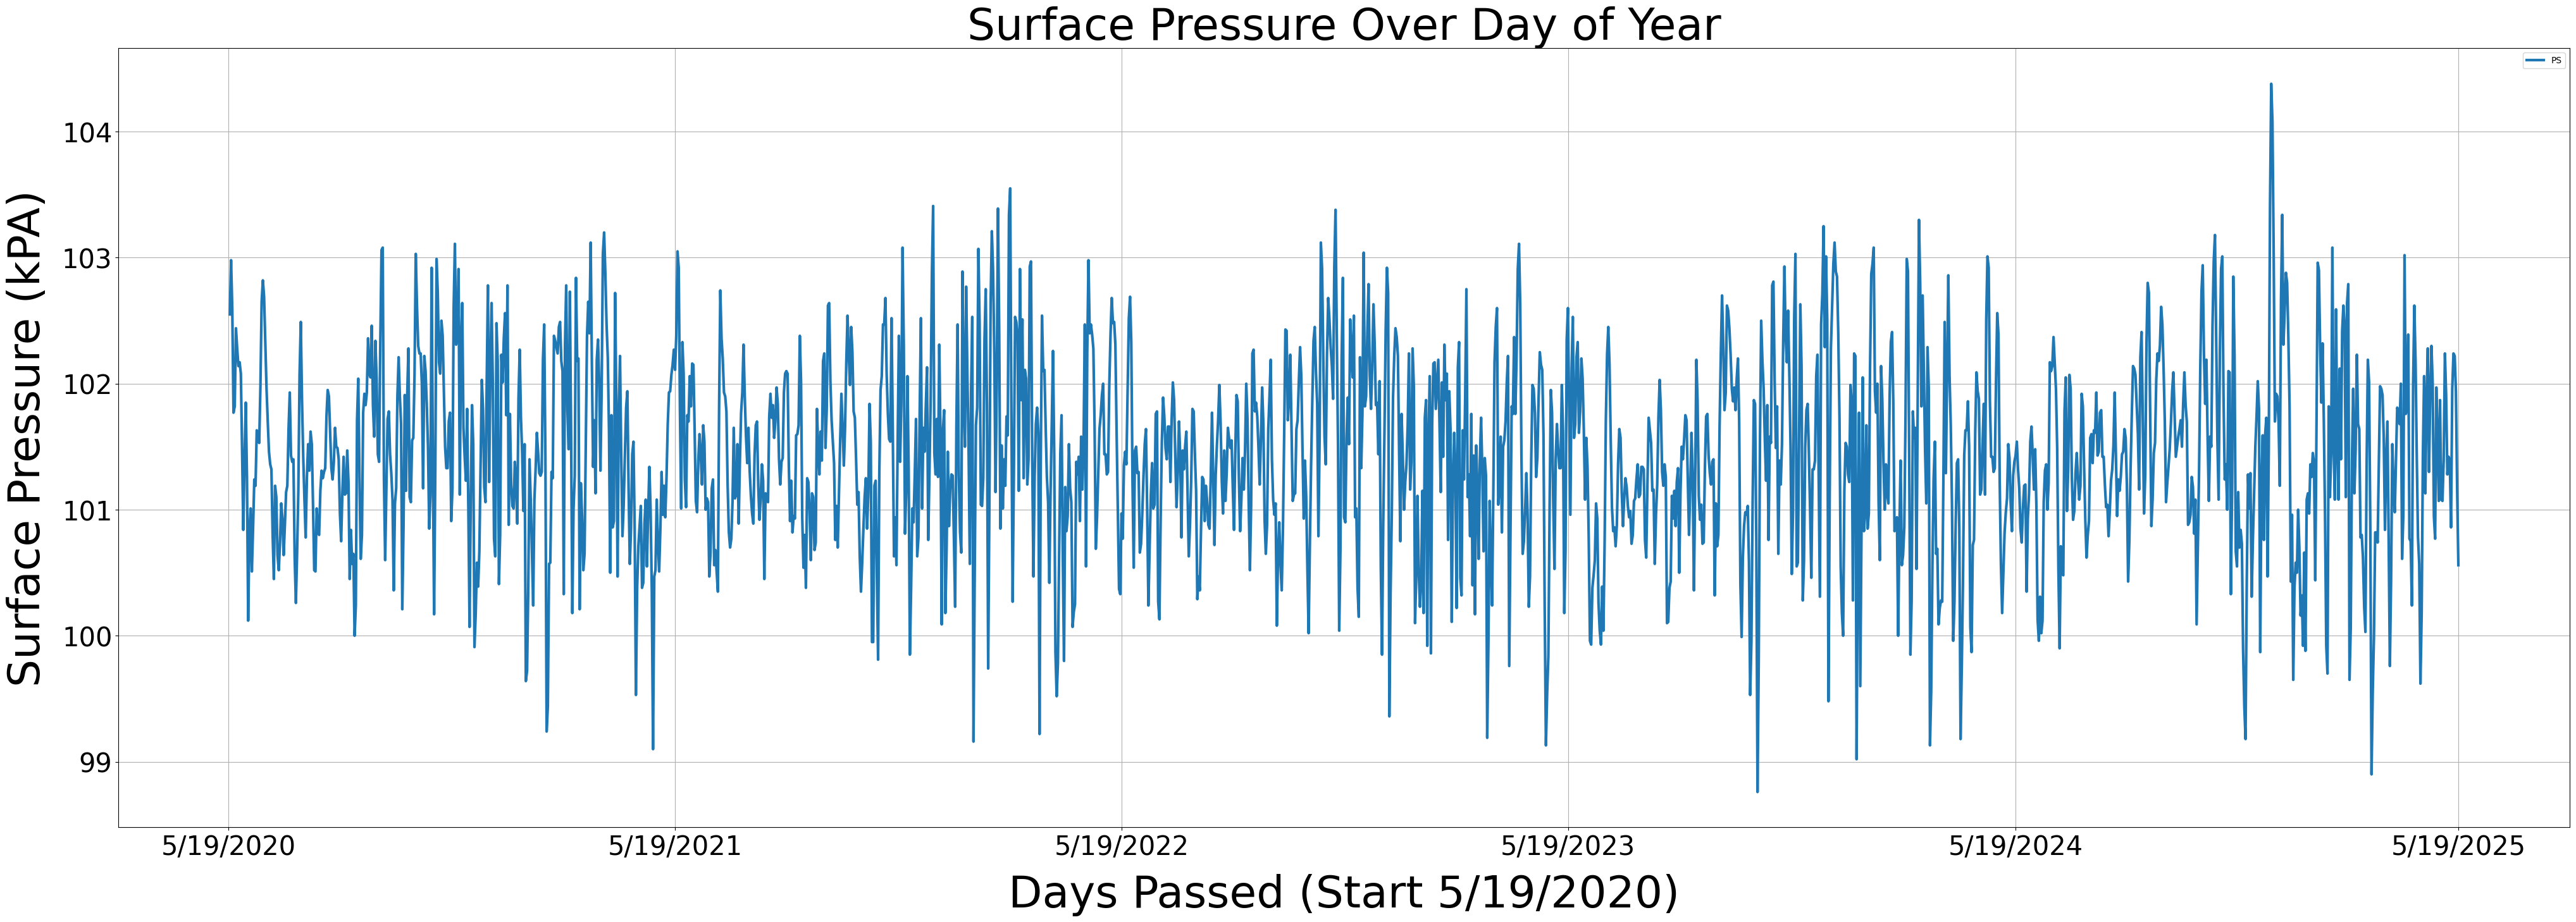

In [ ]:
# Time series plot of Surface Pressure
df.plot(x='DAY NUMBER', y='PS', kind='line',figsize = (50, 16), linewidth = 3)
plt.title('Surface Pressure Over Day of Year', fontsize=50)
plt.xlabel("Days Passed (Start 5/19/2020)", fontsize=50, labelpad=15)
plt.ylabel("Surface Pressure (kPA)", fontsize=50, labelpad=15)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
tick_positions = [0, 365, 730, 1095, 1461, 1823]
tick_labels = ['5/19/2020', '5/19/2021', '5/19/2022', '5/19/2023', '5/19/2024', '5/19/2025']
plt.xticks(tick_positions, tick_labels)
plt.grid()
plt.show()

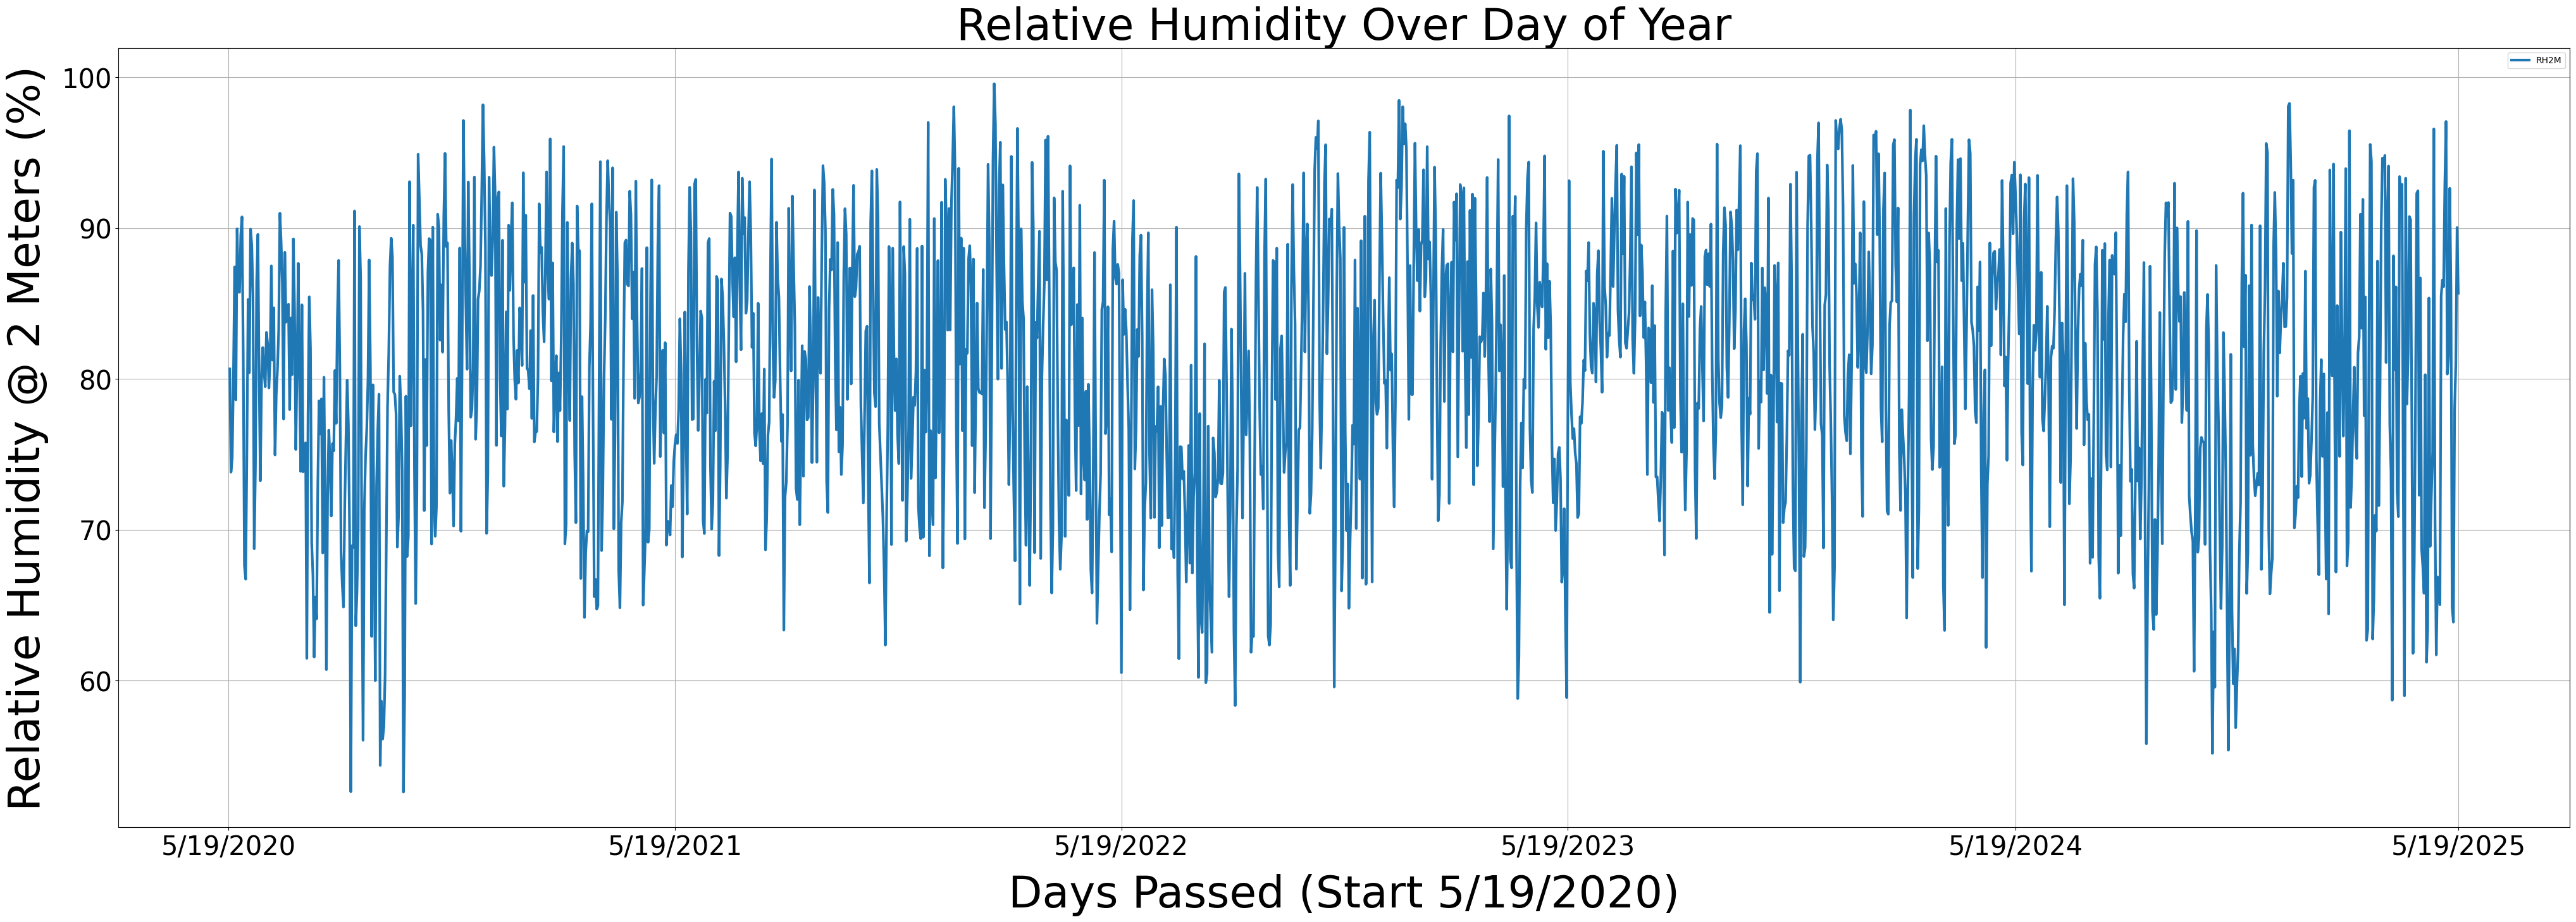

In [ ]:
# Time series plot of Relative Humidity
df.plot(x='DAY NUMBER', y='RH2M', kind='line',figsize = (50, 16), linewidth = 3)
plt.title('Relative Humidity Over Day of Year', fontsize=50)
plt.xlabel("Days Passed (Start 5/19/2020)", fontsize=50, labelpad=15)
plt.ylabel("Relative Humidity @ 2 Meters (%)", fontsize=50, labelpad=15)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
tick_positions = [0, 365, 730, 1095, 1461, 1823]
tick_labels = ['5/19/2020', '5/19/2021', '5/19/2022', '5/19/2023', '5/19/2024', '5/19/2025']
plt.xticks(tick_positions, tick_labels)
plt.grid()
plt.show()

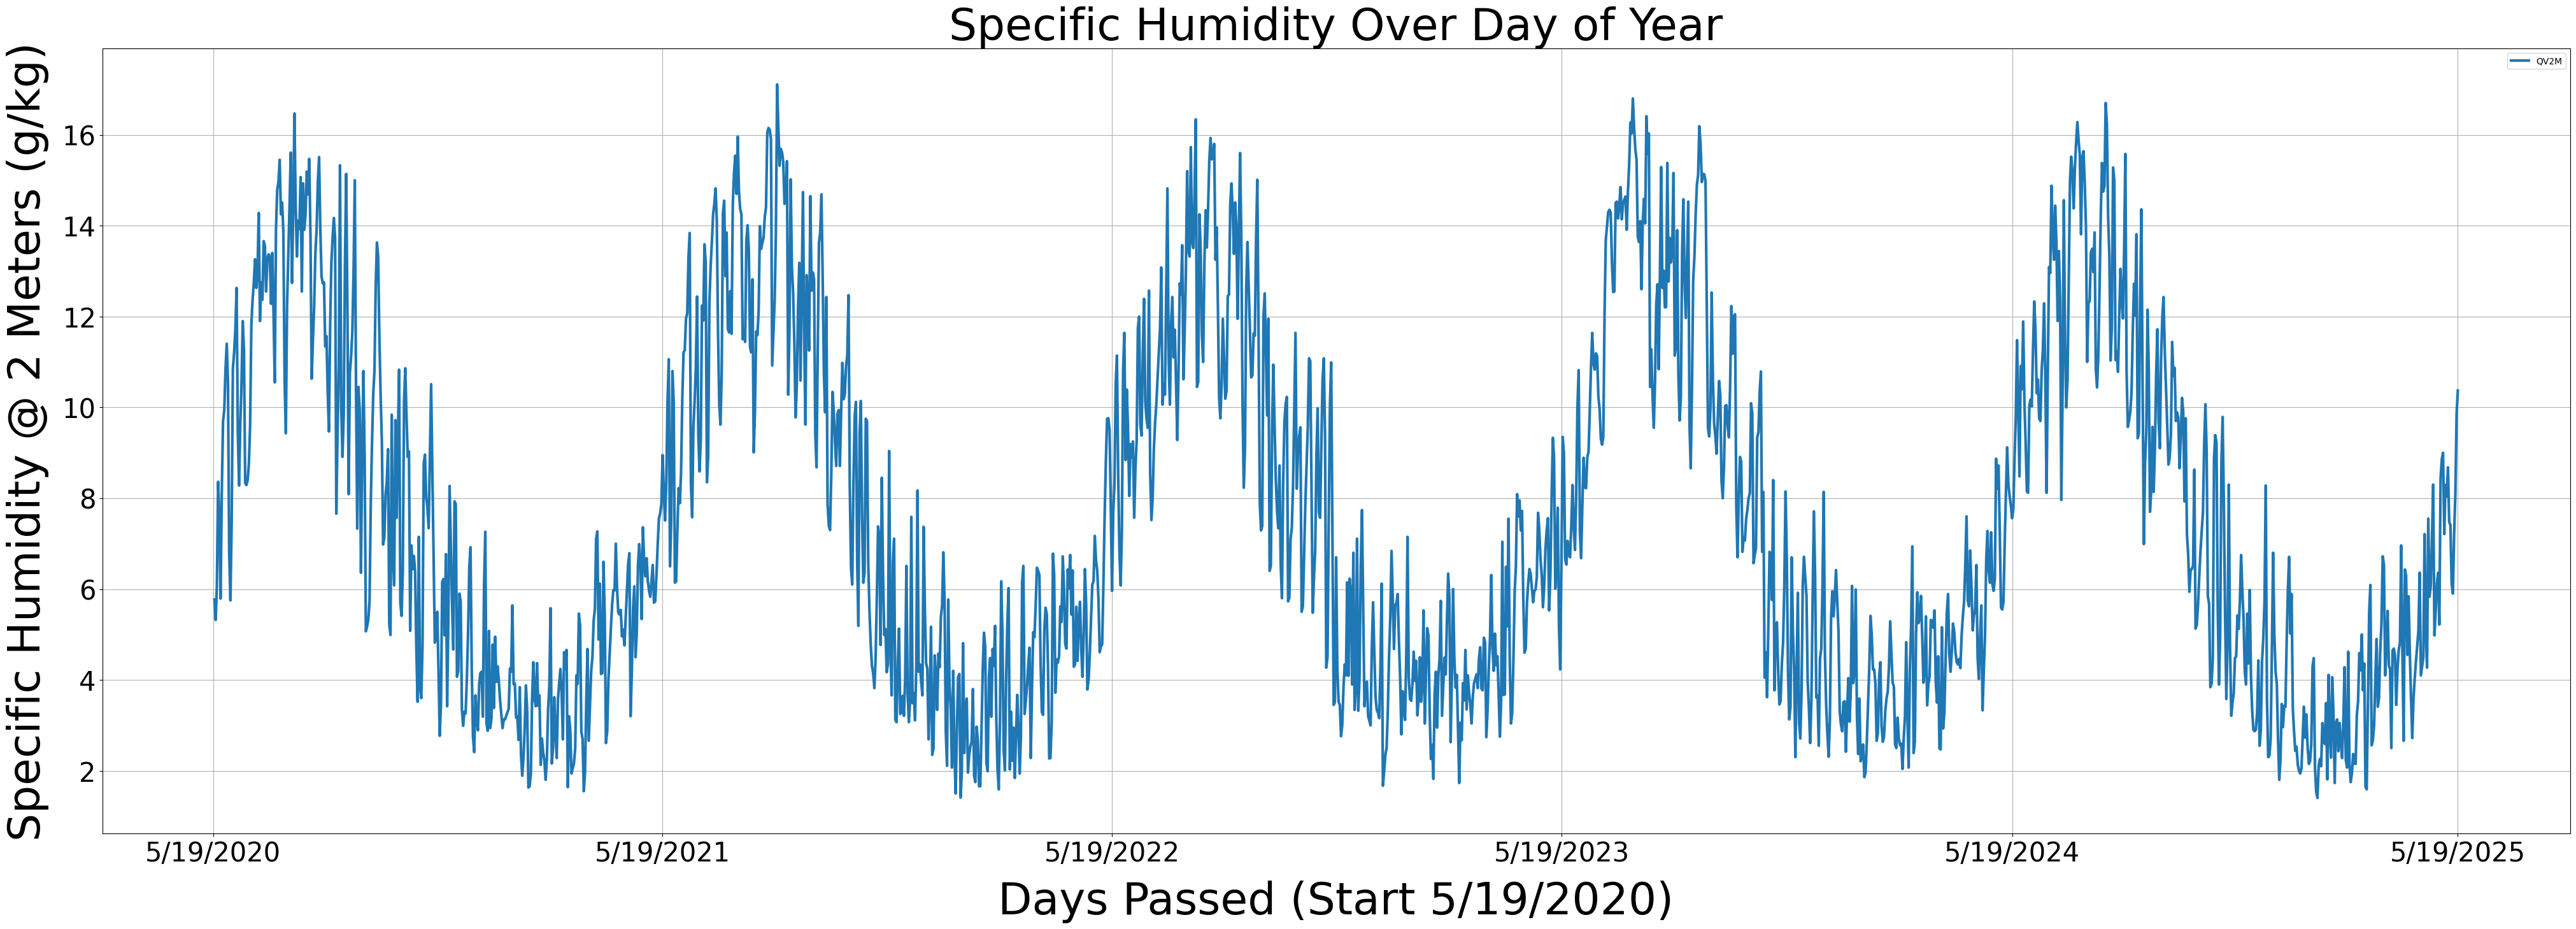

In [ ]:
# Time series plot of Specific Humidity
df.plot(x='DAY NUMBER', y='QV2M', kind='line',figsize = (50, 16), linewidth = 3)
plt.title('Specific Humidity Over Day of Year', fontsize=50)
plt.xlabel("Days Passed (Start 5/19/2020)", fontsize=50, labelpad=15)
plt.ylabel("Specific Humidity @ 2 Meters (g/kg)", fontsize=50, labelpad=15)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
tick_positions = [0, 365, 730, 1095, 1461, 1823]
tick_labels = ['5/19/2020', '5/19/2021', '5/19/2022', '5/19/2023', '5/19/2024', '5/19/2025']
plt.xticks(tick_positions, tick_labels)
plt.grid()
plt.show()

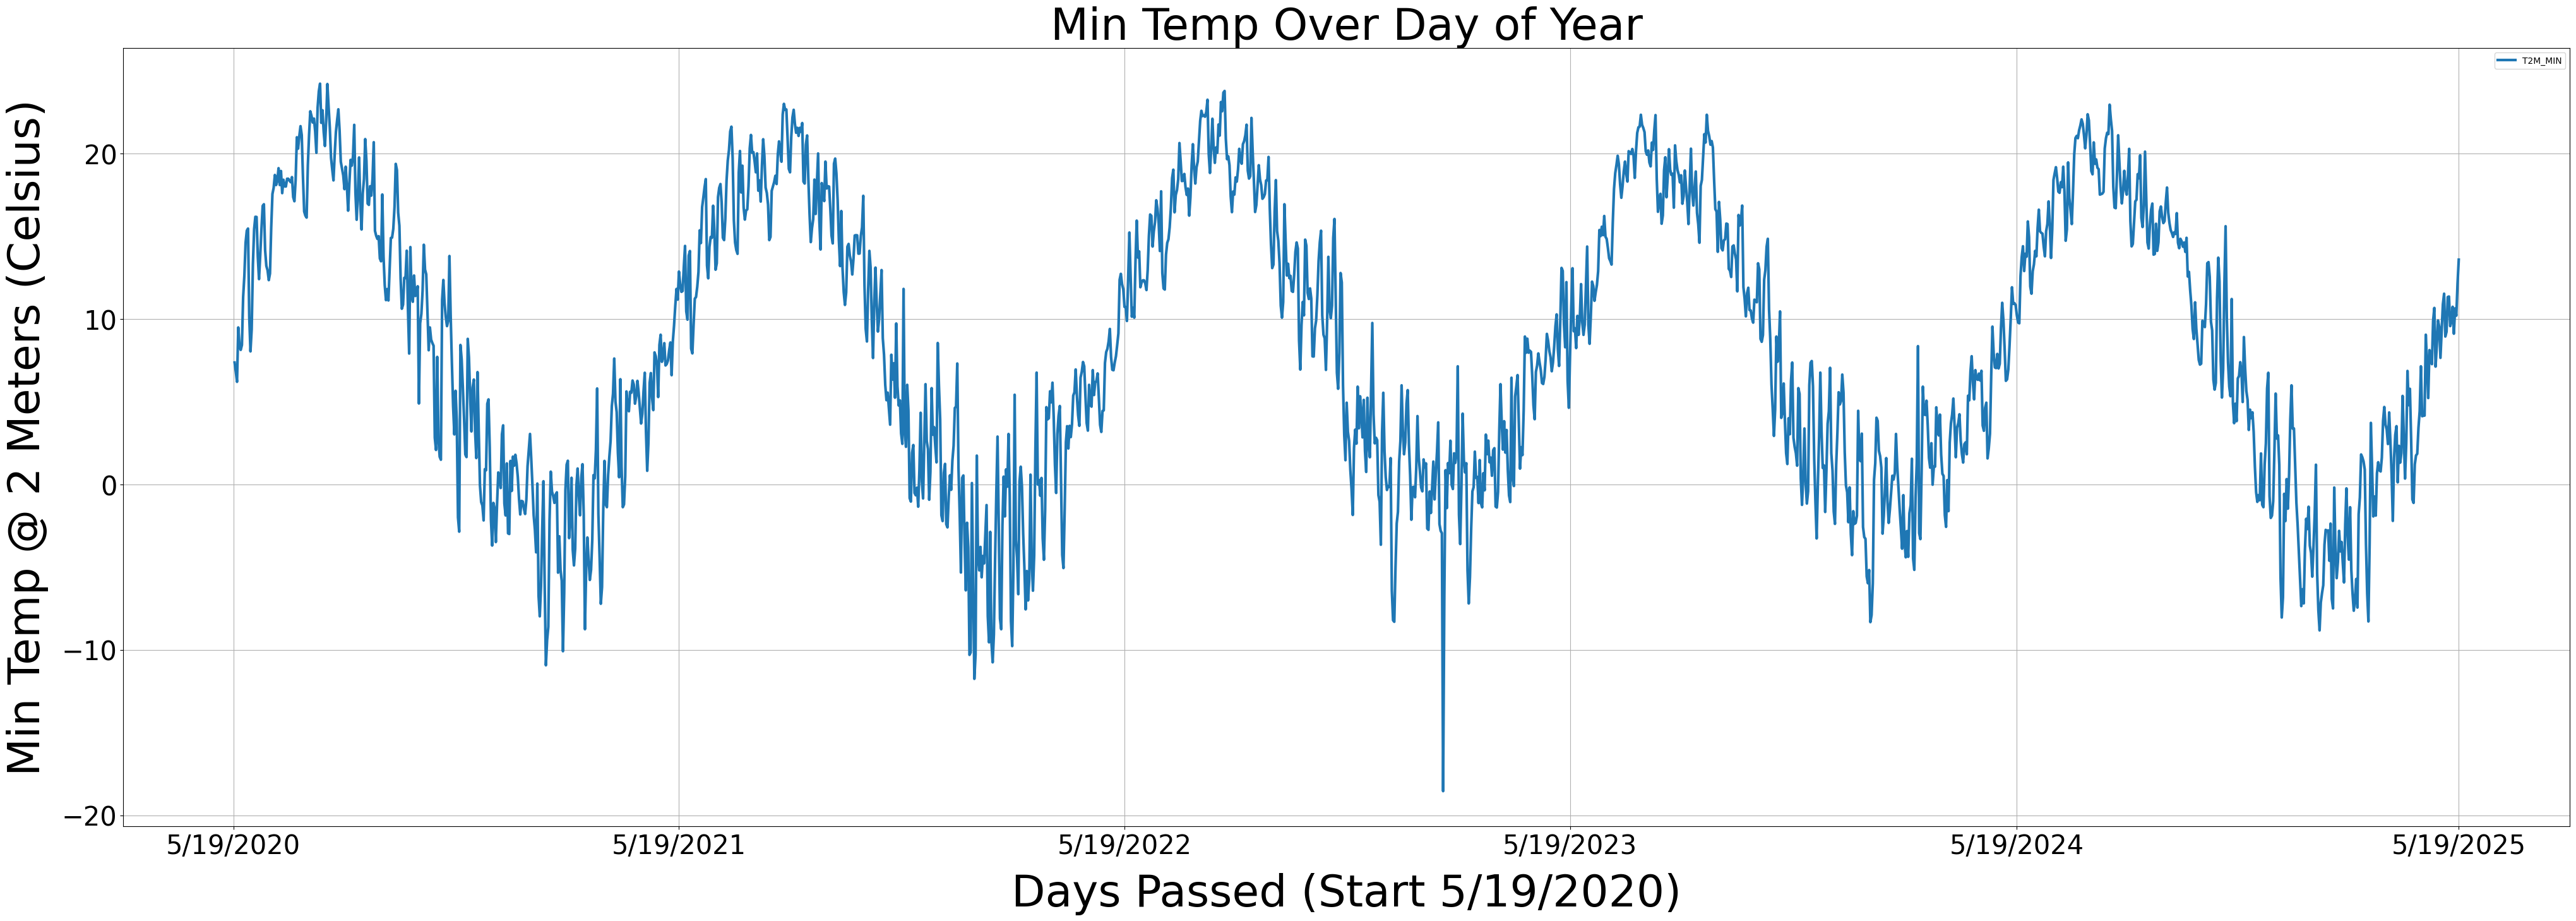

In [ ]:
# Time series plot of Min Temp
df.plot(x='DAY NUMBER', y='T2M_MIN', kind='line',figsize = (50, 16), linewidth = 3)
plt.title('Min Temp Over Day of Year', fontsize=50)
plt.xlabel("Days Passed (Start 5/19/2020)", fontsize=50, labelpad=15)
plt.ylabel("Min Temp @ 2 Meters (Celsius)", fontsize=50, labelpad=15)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
tick_positions = [0, 365, 730, 1095, 1461, 1823]
tick_labels = ['5/19/2020', '5/19/2021', '5/19/2022', '5/19/2023', '5/19/2024', '5/19/2025']
plt.xticks(tick_positions, tick_labels)
plt.grid()
plt.show()

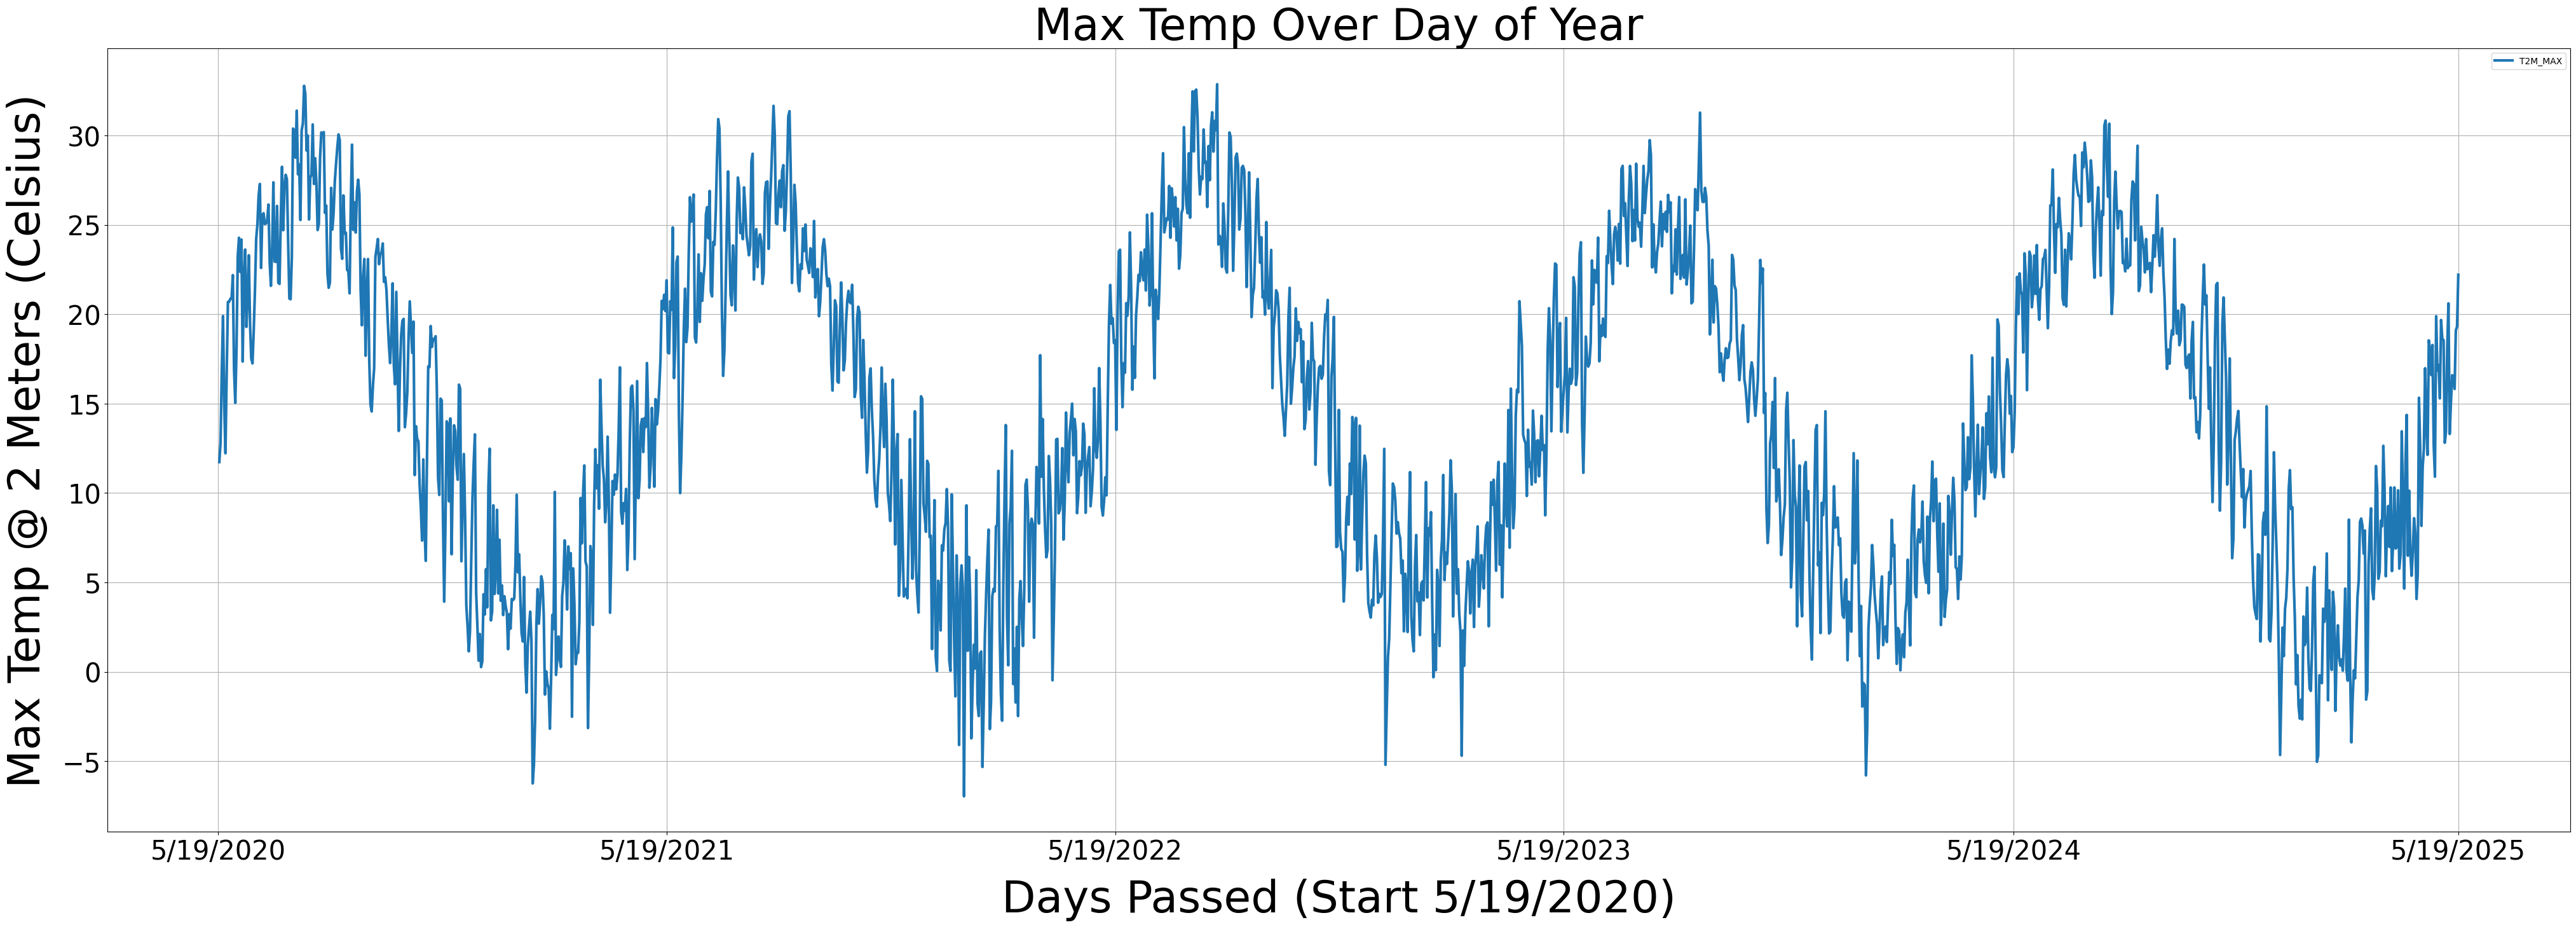

In [ ]:
# Time series plot of Max Temp
df.plot(x='DAY NUMBER', y='T2M_MAX', kind='line',figsize = (50, 16), linewidth = 3)
plt.title('Max Temp Over Day of Year', fontsize=50)
plt.xlabel("Days Passed (Start 5/19/2020)", fontsize=50, labelpad=15)
plt.ylabel("Max Temp @ 2 Meters (Celsius)", fontsize=50, labelpad=15)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
tick_positions = [0, 365, 730, 1095, 1461, 1823]
tick_labels = ['5/19/2020', '5/19/2021', '5/19/2022', '5/19/2023', '5/19/2024', '5/19/2025']
plt.xticks(tick_positions, tick_labels)
plt.grid()
plt.show()

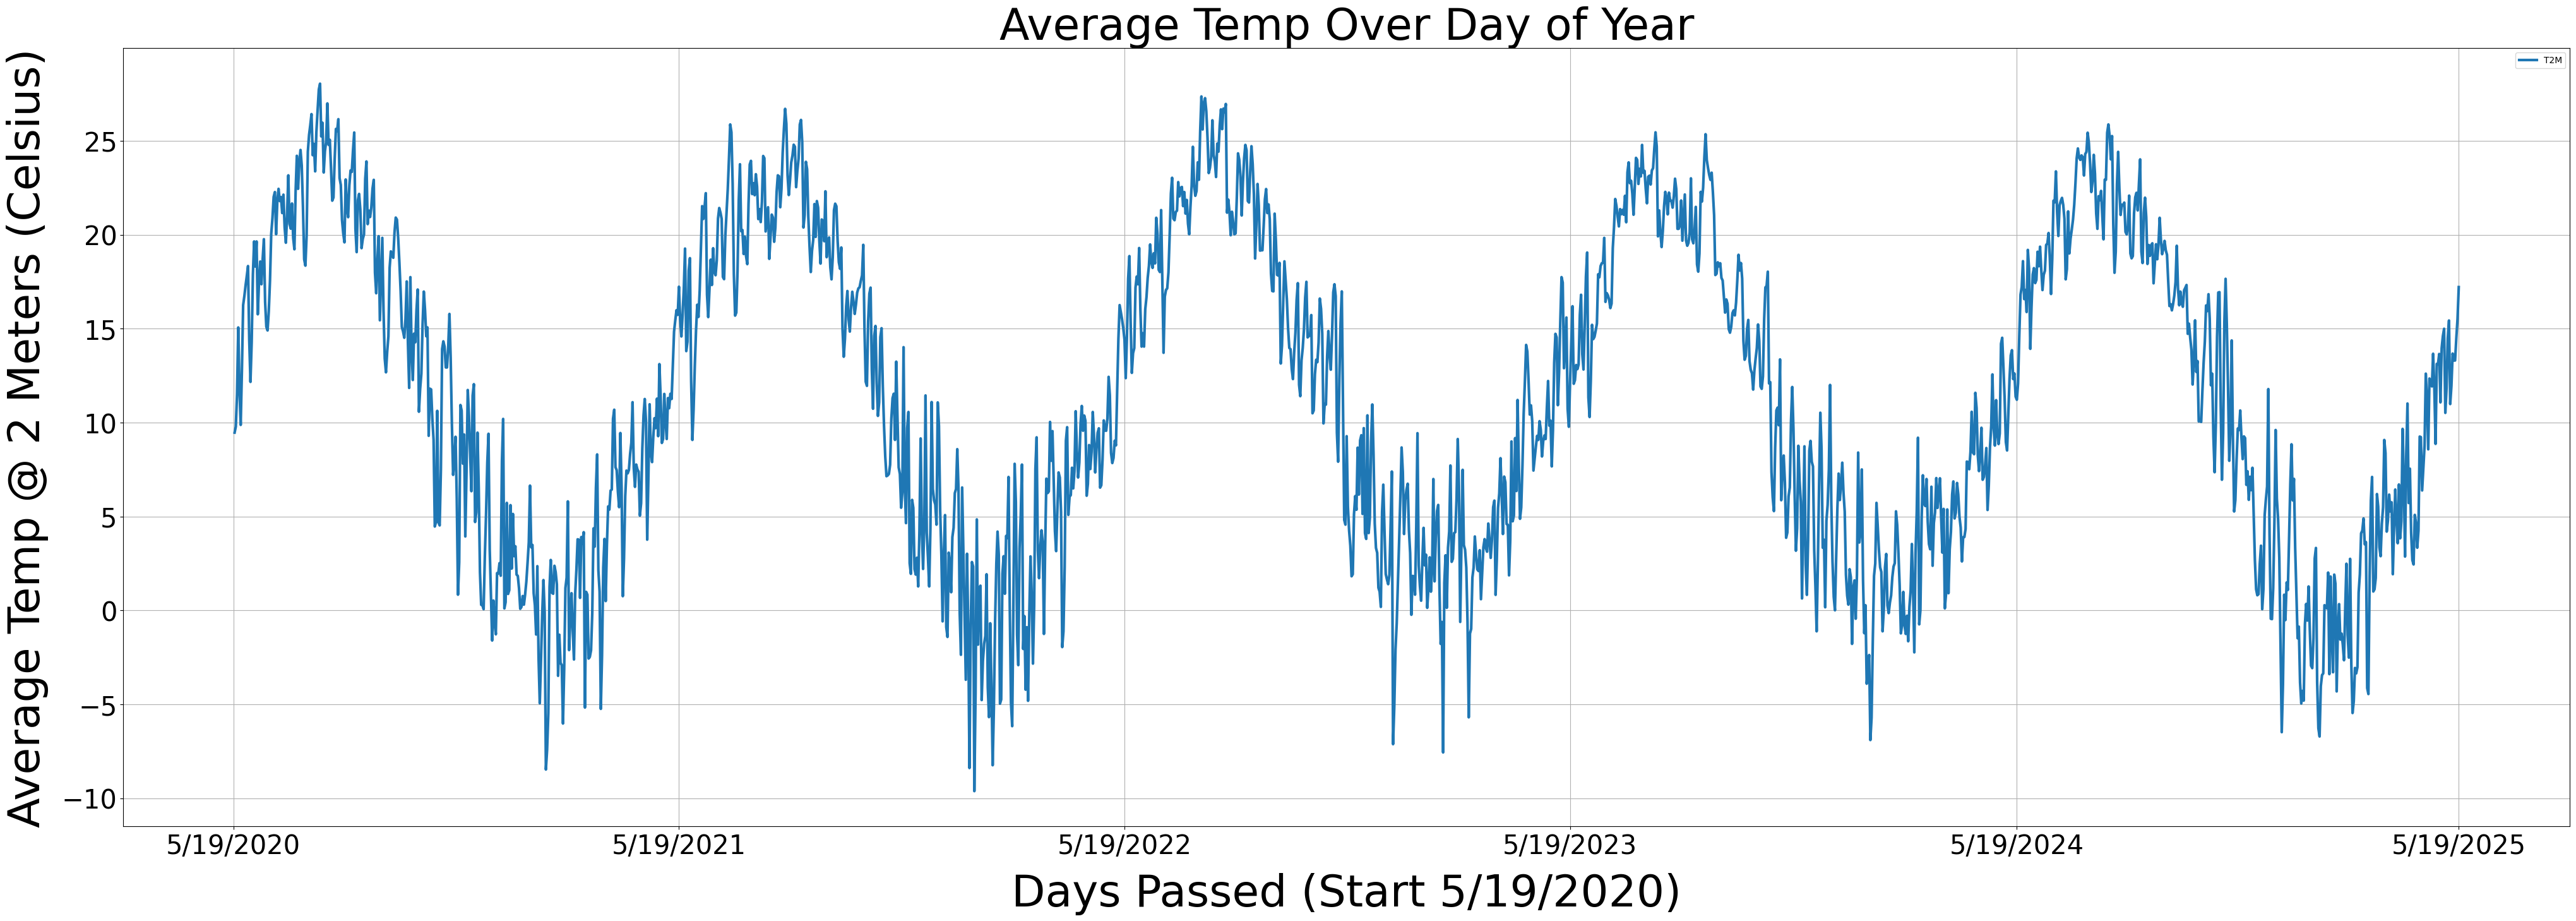

In [ ]:
# Time series plot of Average Temp
df.plot(x='DAY NUMBER', y='T2M', kind='line',figsize = (50, 16), linewidth = 3)
plt.title('Average Temp Over Day of Year', fontsize=50)
plt.xlabel("Days Passed (Start 5/19/2020)", fontsize=50, labelpad=15)
plt.ylabel("Average Temp @ 2 Meters (Celsius)", fontsize=50, labelpad=15)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
tick_positions = [0, 365, 730, 1095, 1461, 1823]
tick_labels = ['5/19/2020', '5/19/2021', '5/19/2022', '5/19/2023', '5/19/2024', '5/19/2025']
plt.xticks(tick_positions, tick_labels)
plt.grid()
plt.show()

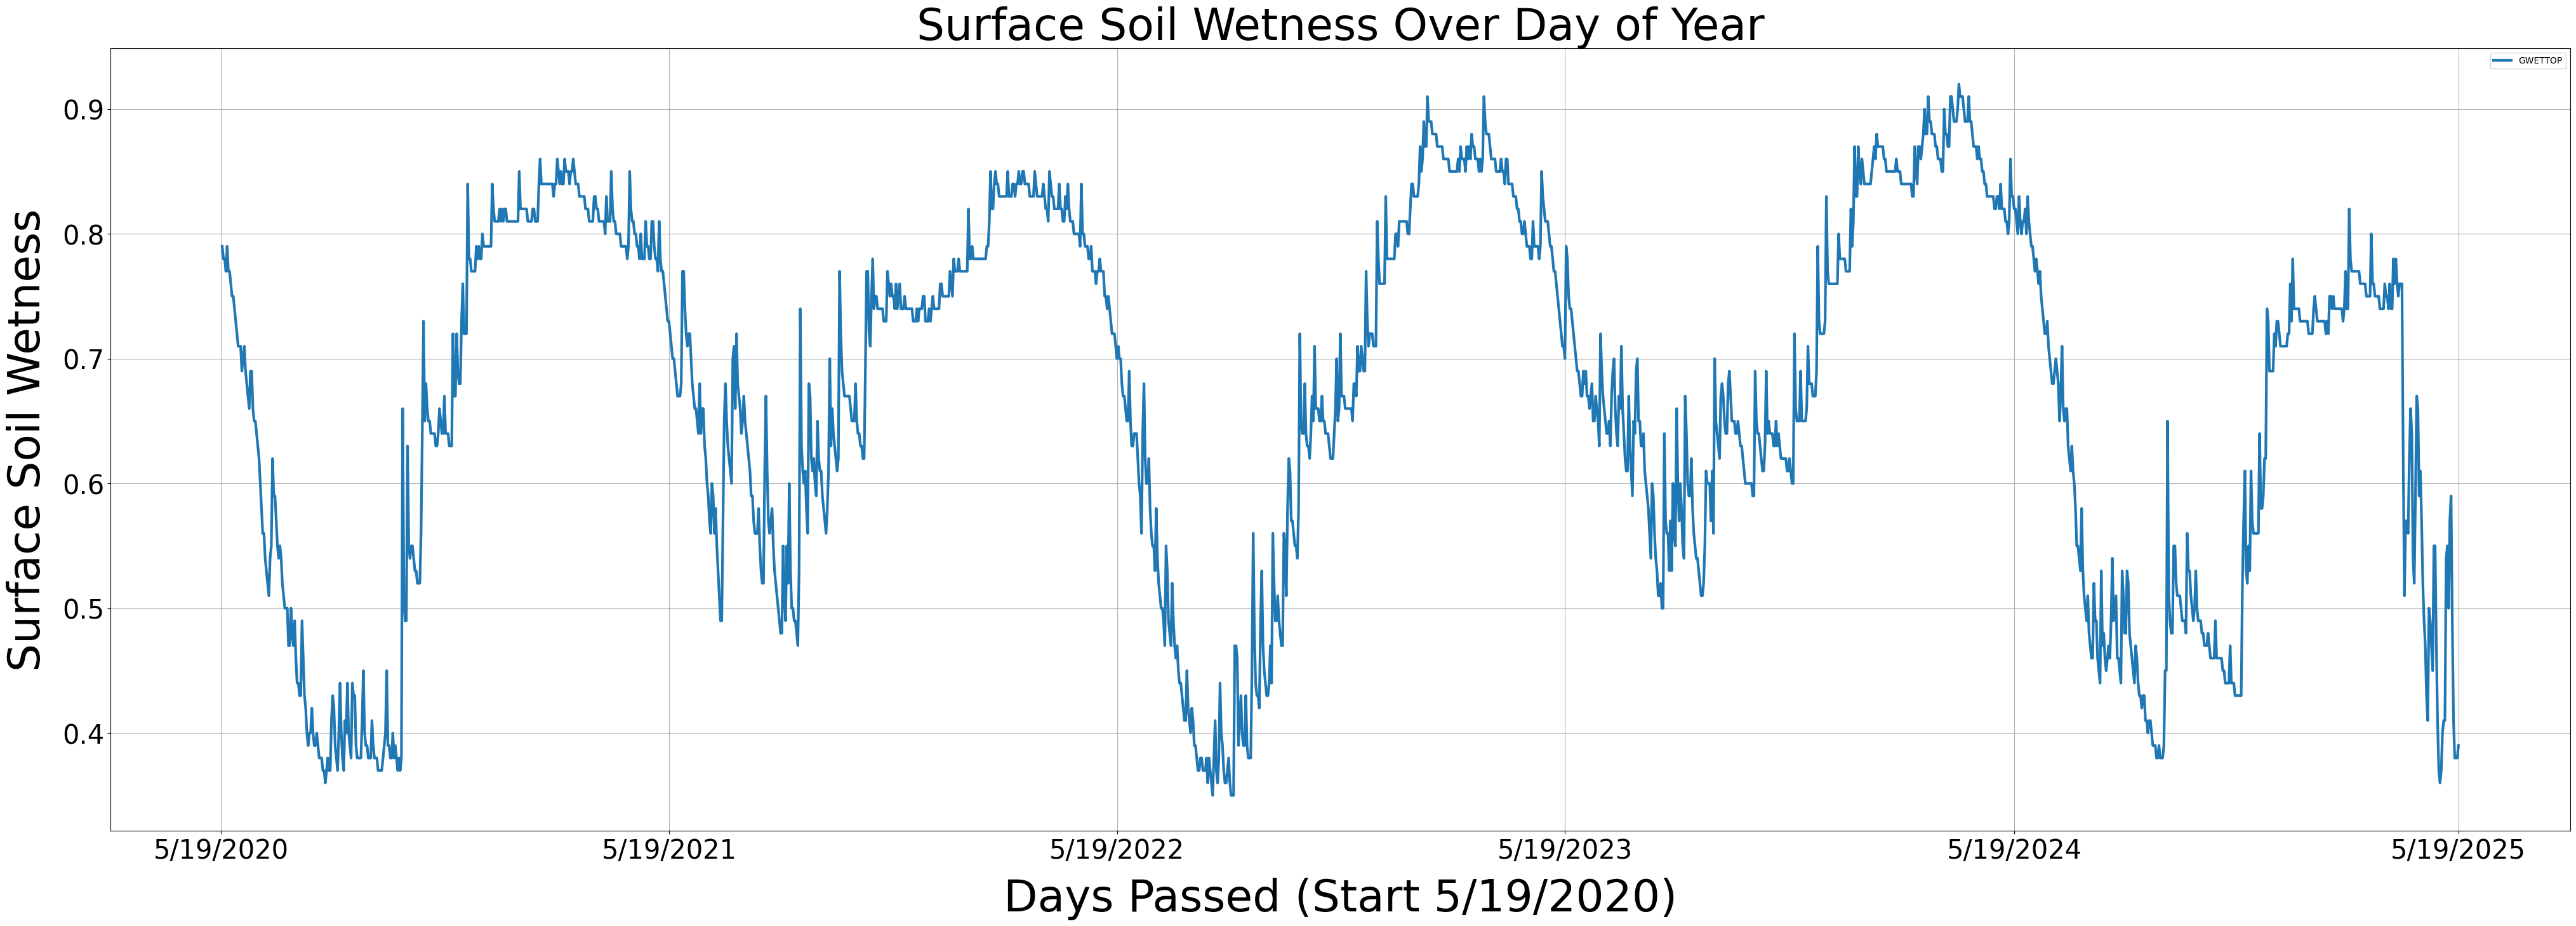

In [ ]:
# Time series plot of Surface Soil Wetness
df.plot(x='DAY NUMBER', y='GWETTOP', kind='line',figsize = (50, 16), linewidth = 3)
plt.title('Surface Soil Wetness Over Day of Year', fontsize=50)
plt.xlabel("Days Passed (Start 5/19/2020)", fontsize=50, labelpad=15)
plt.ylabel("Surface Soil Wetness", fontsize=50, labelpad=15)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
tick_positions = [0, 365, 730, 1095, 1461, 1823]
tick_labels = ['5/19/2020', '5/19/2021', '5/19/2022', '5/19/2023', '5/19/2024', '5/19/2025']
plt.xticks(tick_positions, tick_labels)
plt.grid()
plt.show()

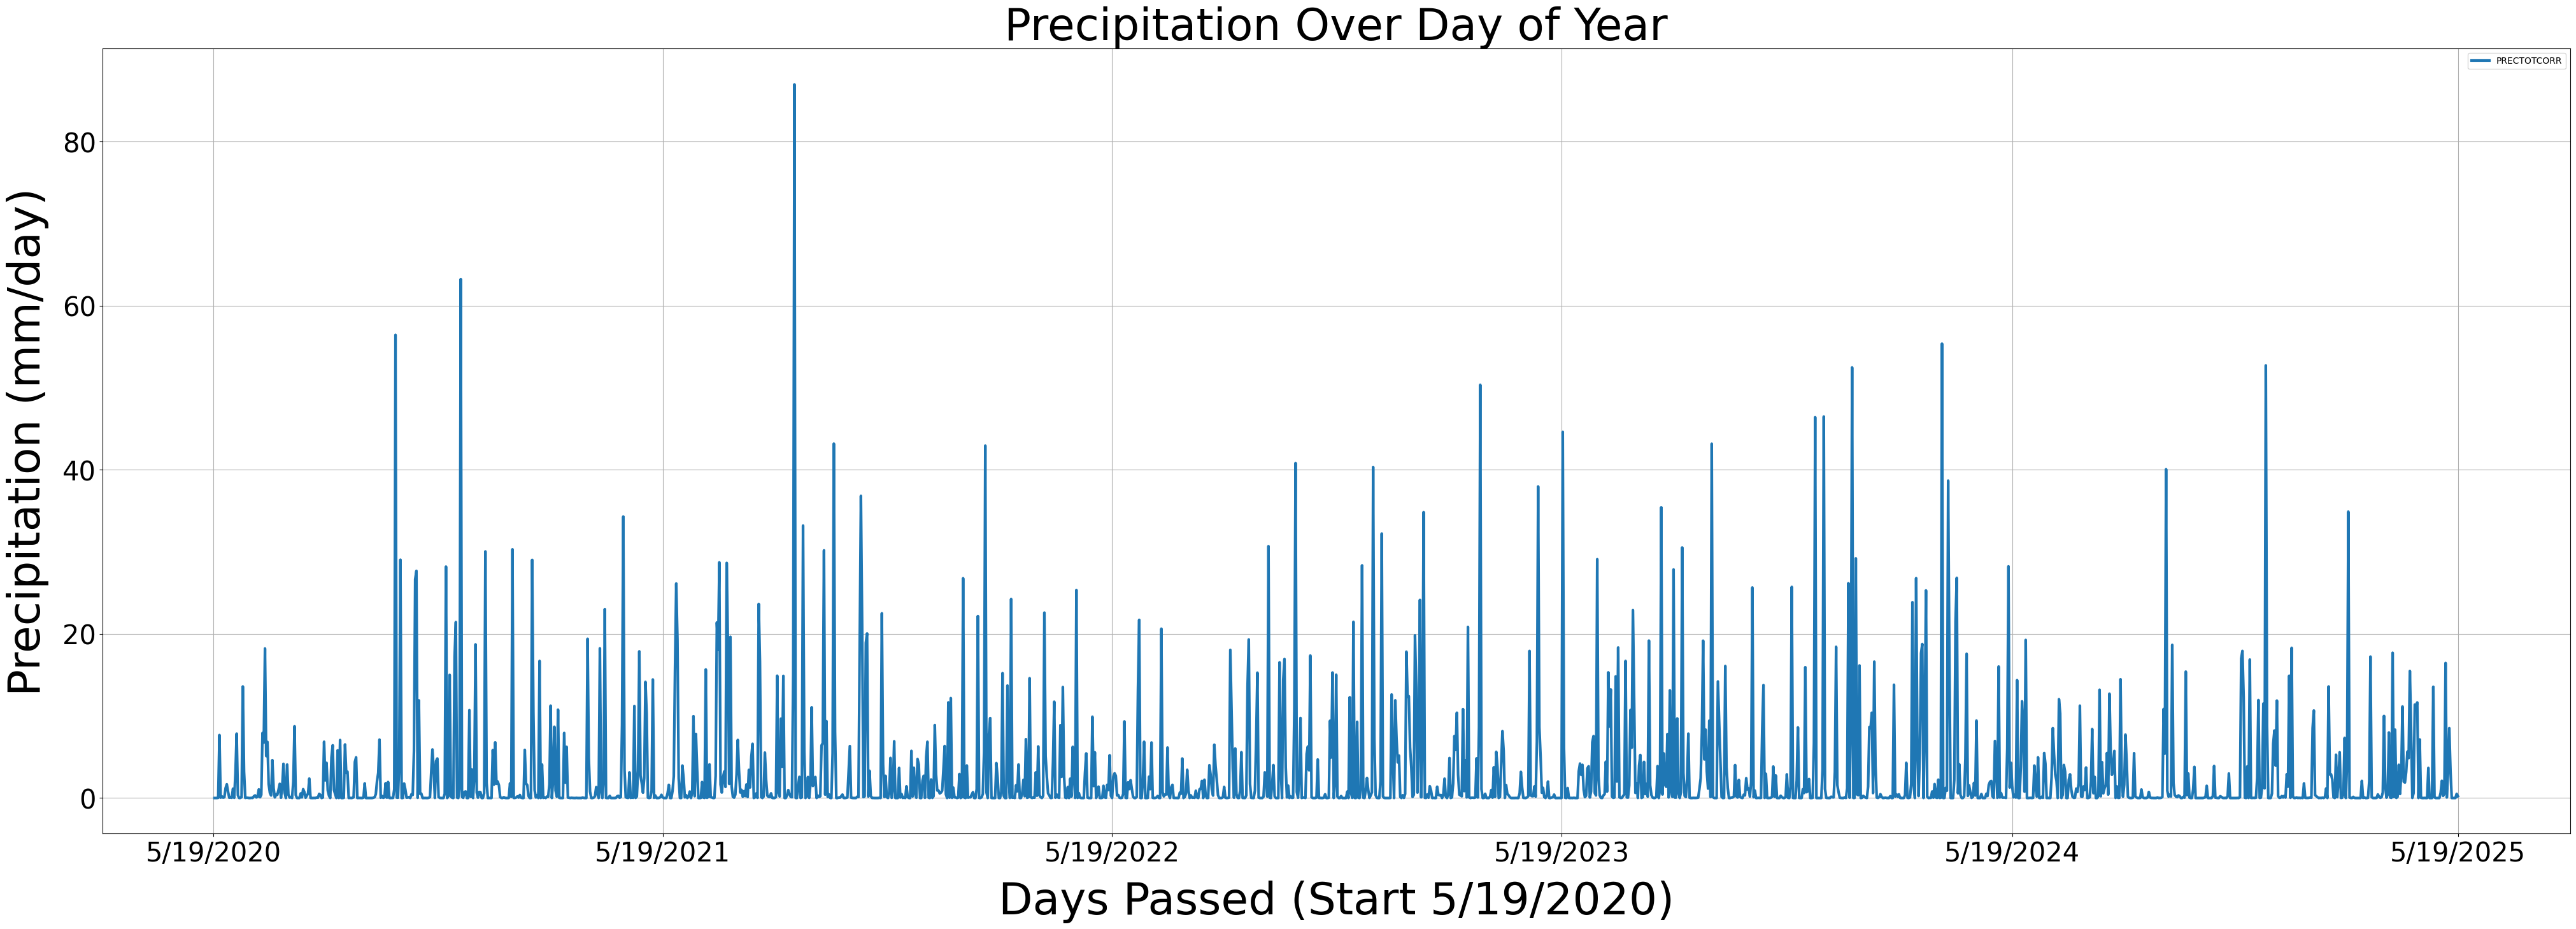

In [ ]:
# Time series plot of Precipitation
df.plot(x='DAY NUMBER', y='PRECTOTCORR', kind='line',figsize = (50, 16), linewidth = 3)
plt.title('Precipitation Over Day of Year', fontsize=50)
plt.xlabel("Days Passed (Start 5/19/2020)", fontsize=50, labelpad=15)
plt.ylabel("Precipitation (mm/day)", fontsize=50, labelpad=15)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
tick_positions = [0, 365, 730, 1095, 1461, 1823]
tick_labels = ['5/19/2020', '5/19/2021', '5/19/2022', '5/19/2023', '5/19/2024', '5/19/2025']
plt.xticks(tick_positions, tick_labels)
plt.grid()
plt.show()

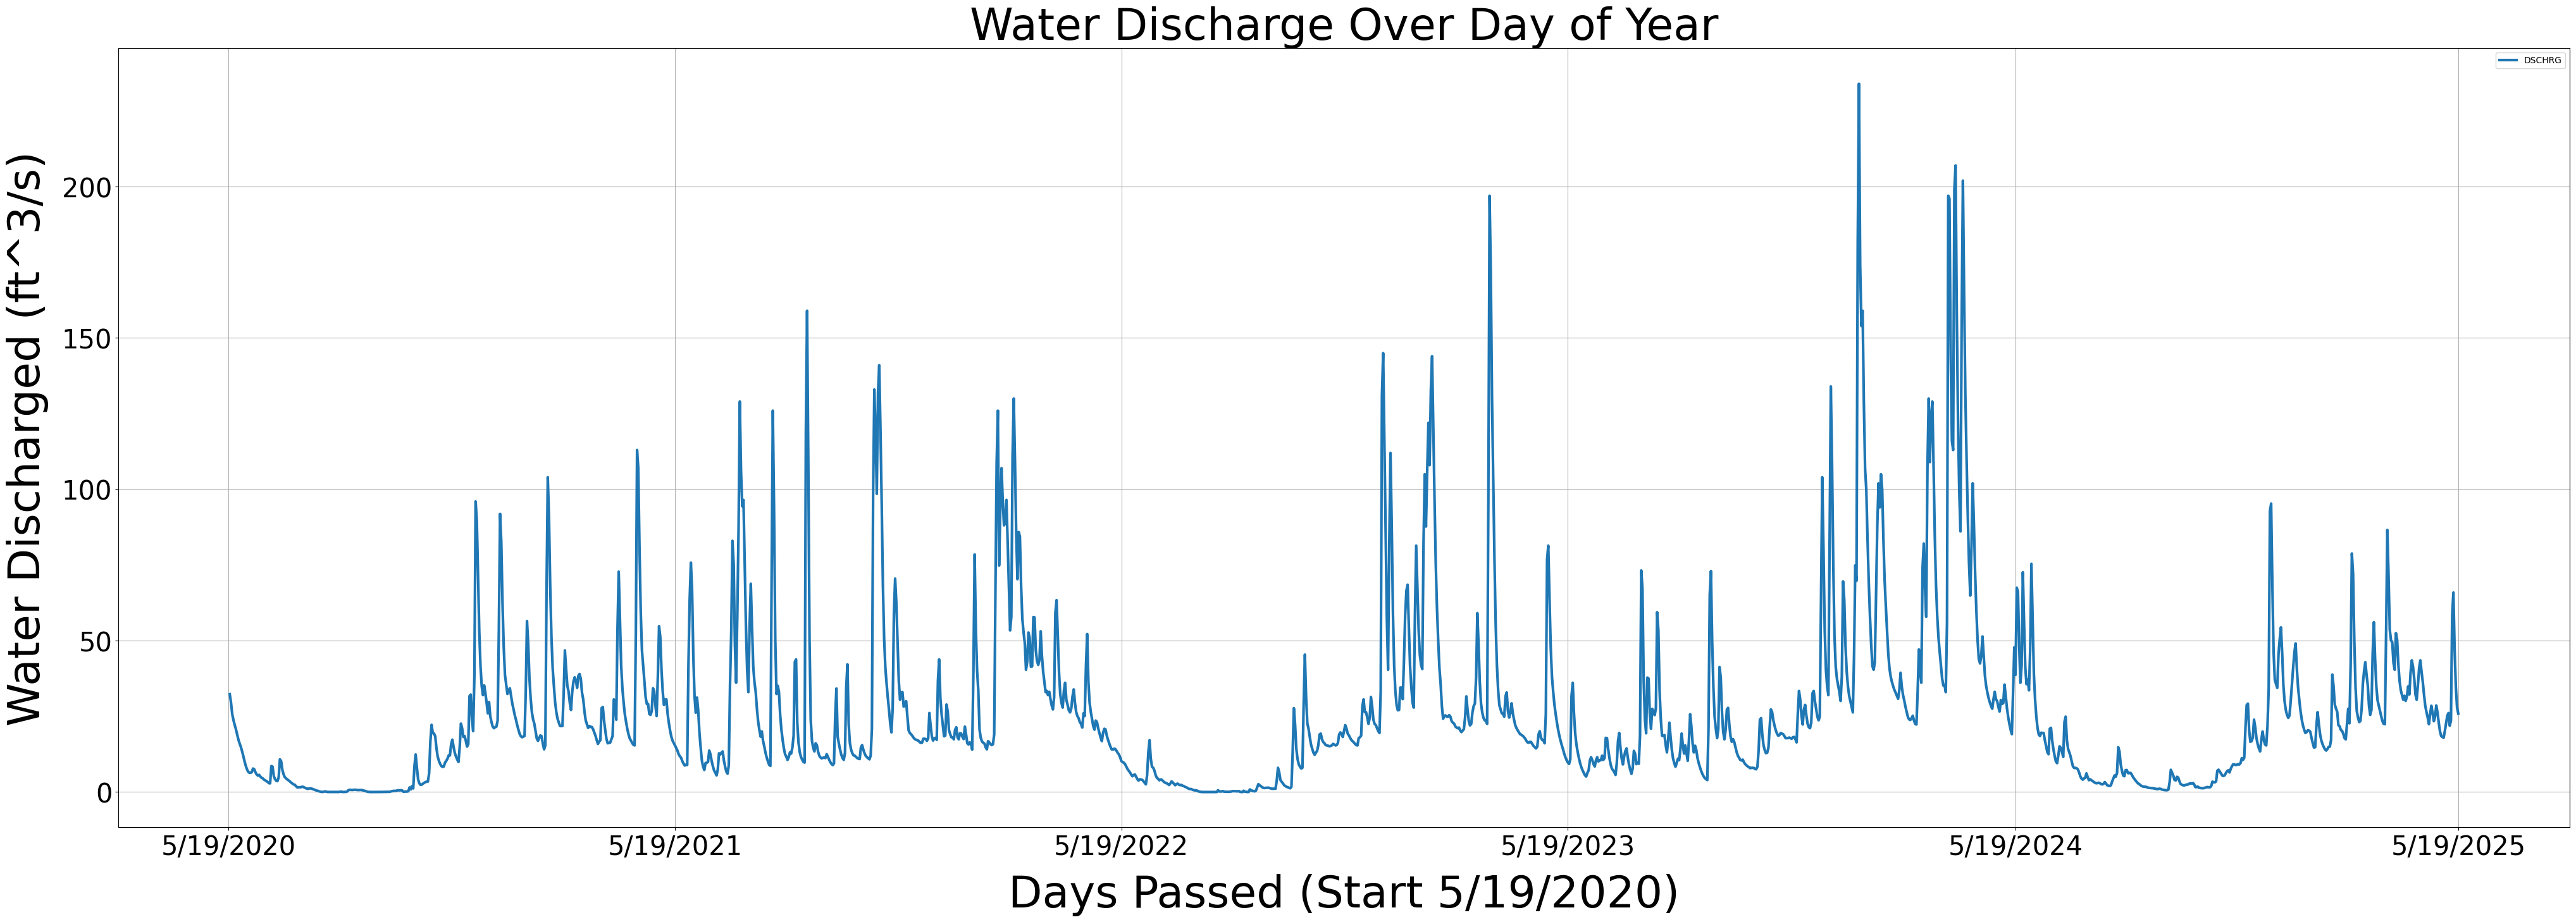

In [ ]:
# Time series plot of Discharge
df.plot(x='DAY NUMBER', y='DSCHRG', kind='line',figsize = (50, 16), linewidth = 3)
plt.title('Water Discharge Over Day of Year', fontsize=50)
plt.xlabel("Days Passed (Start 5/19/2020)", fontsize=50, labelpad=15)
plt.ylabel("Water Discharged (ft^3/s)", fontsize=50, labelpad=15)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
tick_positions = [0, 365, 730, 1095, 1461, 1823]
tick_labels = ['5/19/2020', '5/19/2021', '5/19/2022', '5/19/2023', '5/19/2024', '5/19/2025']
plt.xticks(tick_positions, tick_labels)
plt.grid()
plt.show()

In [ ]:
# Splitting the data into 80% training and 20% testing
features = ["PRECTOTCORR", "GWETTOP", "T2M_MAX", "T2M_MIN", "T2M", "RH2M", "QV2M", "PS"]
target = ["DSCHRG"]
X_all = df.loc[:, features]
Y = df.loc[:, target]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y, train_size=0.8, shuffle =True)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1458, 8)
(365, 8)
(1458, 1)
(365, 1)


Model Coefficient = 0.007632941792300513


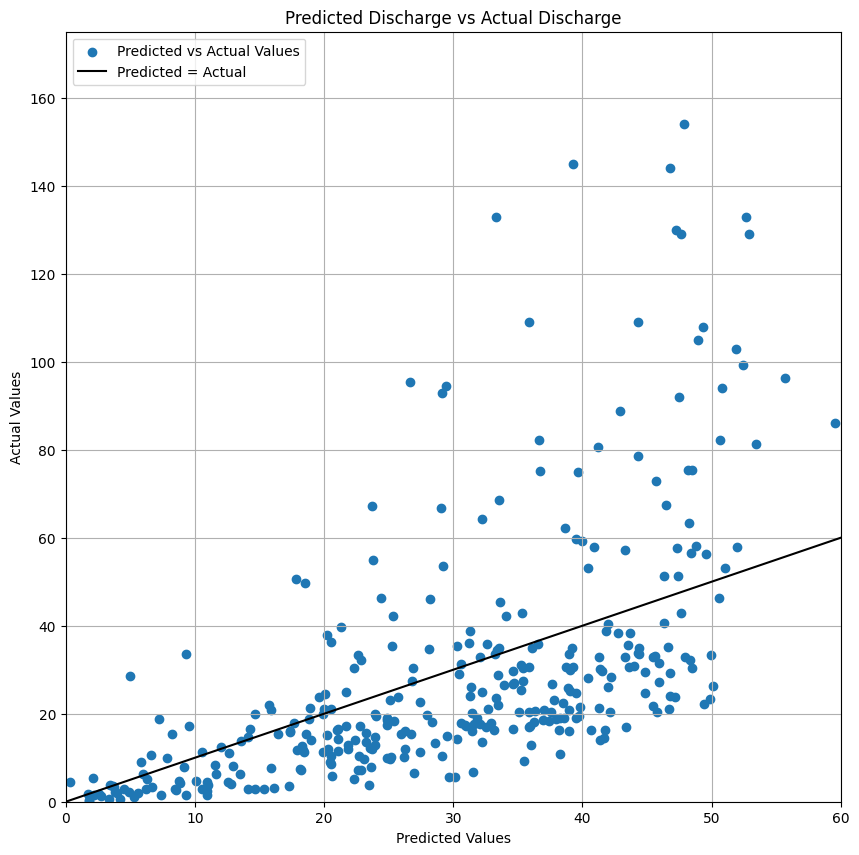

In [ ]:
# Regression Modeling, and diagnostic plot of predicted discharge vs actual discharge
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model_intercept = LinearRegression(fit_intercept=True)
model = model.fit(X_train, Y_train)
print("Model Coefficient =", model.coef_[0][0])
Y_pred = model.predict(X_test)
plt.figure(figsize=(10, 10))
plt.scatter(Y_pred,Y_test, label = 'Predicted vs Actual Values')
plt.xlabel('Predicted Values')
plt.xlim([0,60])
plt.ylabel('Actual Values')
plt.ylim([0,175])
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, color = 'k', label = 'Predicted = Actual')
plt.title('Predicted Discharge vs Actual Discharge')
plt.grid()
plt.legend(loc='upper left')
plt.show()

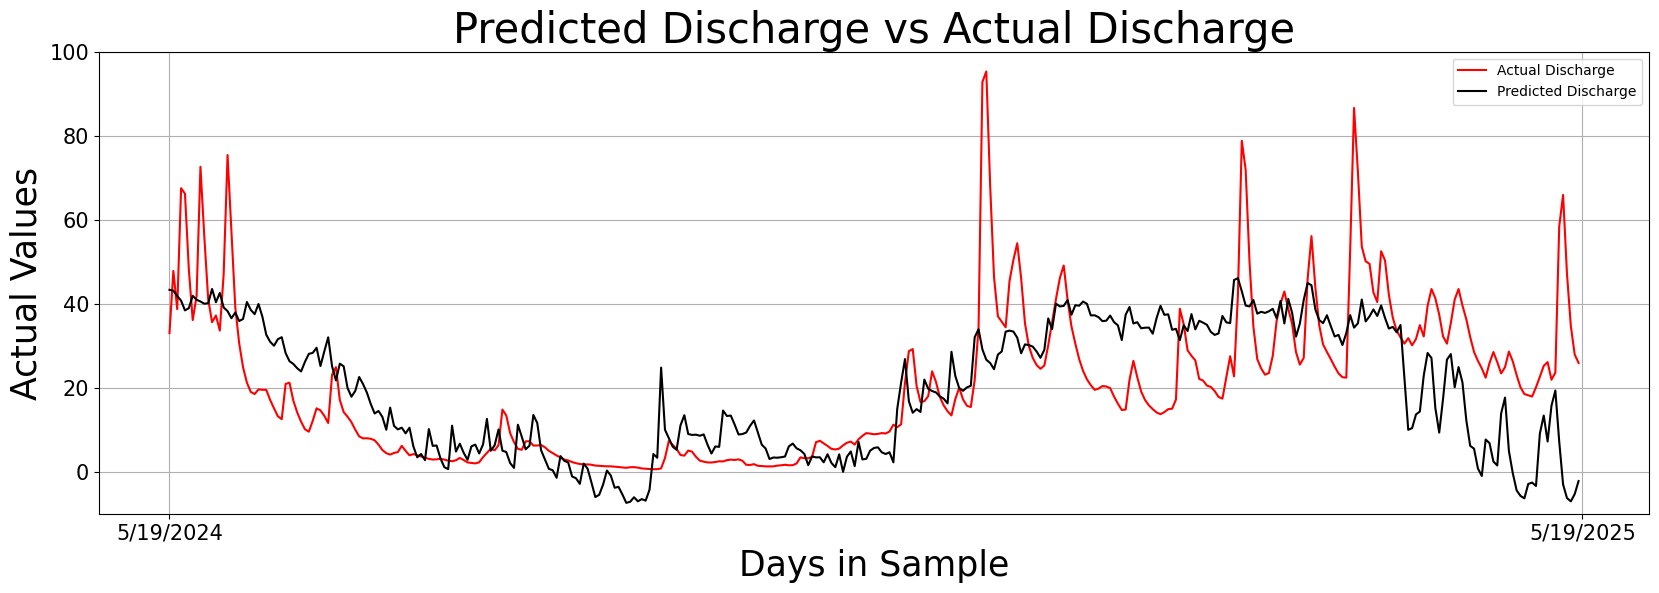

In [ ]:
# Regression Modeling, and diagnostic time plot of predicted discharge and actual discharge
def days_counted(matrix):
  day_counter = []
  for i in range(len(matrix)):
    day_counter.append(i)
  day_counter = np.array(day_counter)
  day_counter = day_counter.reshape(-1, 1)
  return day_counter
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y, train_size=0.8, shuffle =False)
days_counted = days_counted(X_test)
Y_pred = model.predict(X_test)
plt.figure(figsize=(20, 6))
plt.plot(days_counted,Y_test, color = 'red', label = 'Actual Discharge')
plt.plot(days_counted, Y_pred, color = 'k', label = 'Predicted Discharge')
plt.xlabel('Days in Sample', fontsize=25)
plt.ylabel('Actual Values', fontsize=25)
plt.ylim([-10,100])
plt.title('Predicted Discharge vs Actual Discharge', fontsize=30)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
tick_positions = [0, 365]
tick_labels = ['5/19/2024', '5/19/2025']
plt.xticks(tick_positions, tick_labels)
plt.legend()

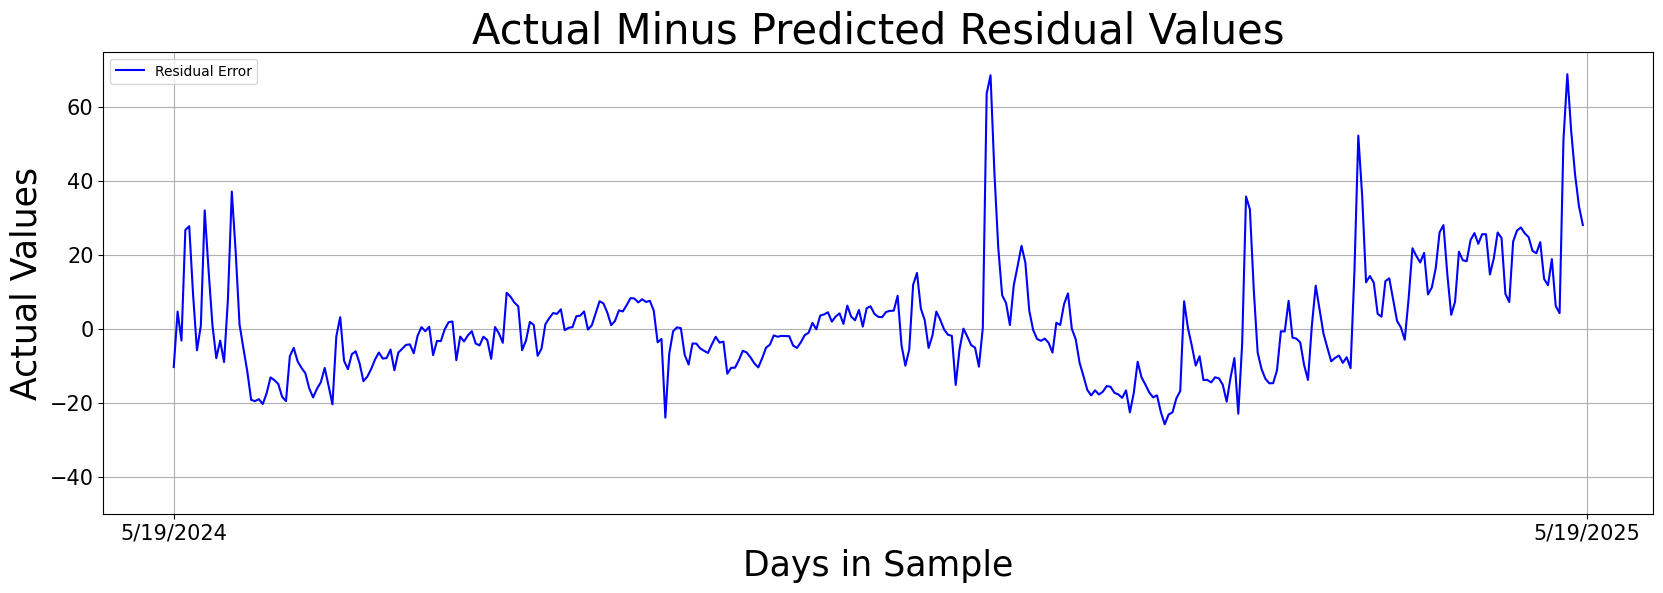

In [ ]:
def compute_residuals(actual, predicted):
  if isinstance(actual, pd.DataFrame):
      actual_values = actual.values.flatten()
  elif isinstance(actual, np.ndarray):
      actual_values = actual.flatten()
  else:
      actual_values = actual
  if isinstance(predicted, np.ndarray):
      predicted_values = predicted.flatten() # Get the numerical values and flatten
  else:
      predicted_values = predicted
  residuals = [a - p for a, p in zip(actual_values, predicted_values)]
  return residuals
residuals = compute_residuals(Y_test, Y_pred)
plt.figure(figsize=(20, 6))
plt.plot(days_counted, residuals, color = 'blue', label = 'Residual Error')
plt.xlabel('Days in Sample', fontsize=25)
plt.ylabel('Actual Values', fontsize=25)
plt.ylim([-50,75])
plt.title('Actual Minus Predicted Residual Values', fontsize=30)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
tick_positions = [0, 365]
tick_labels = ['5/19/2024', '5/19/2025']
plt.xticks(tick_positions, tick_labels)
plt.legend()

In [ ]:
# R squared, MSE, RMSE, and MAE for Linear Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
import numpy as np
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
LRmodel_all = model.fit(X_all, Y)
y2_model= LRmodel_all.predict(X_test)
mse = mean_squared_error(Y_test, y2_model)
rmse = root_mean_squared_error(Y_test, y2_model)
r2 = r2_score(Y_test, y2_model)
mae = mean_absolute_error(Y_test, y2_model)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Squared Error (MSE): 219.6639
Root Mean Squared Error (RMSE): 14.8211
R-squared Score: 0.312
Mean Absolute Error (MAE): 10.6556


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


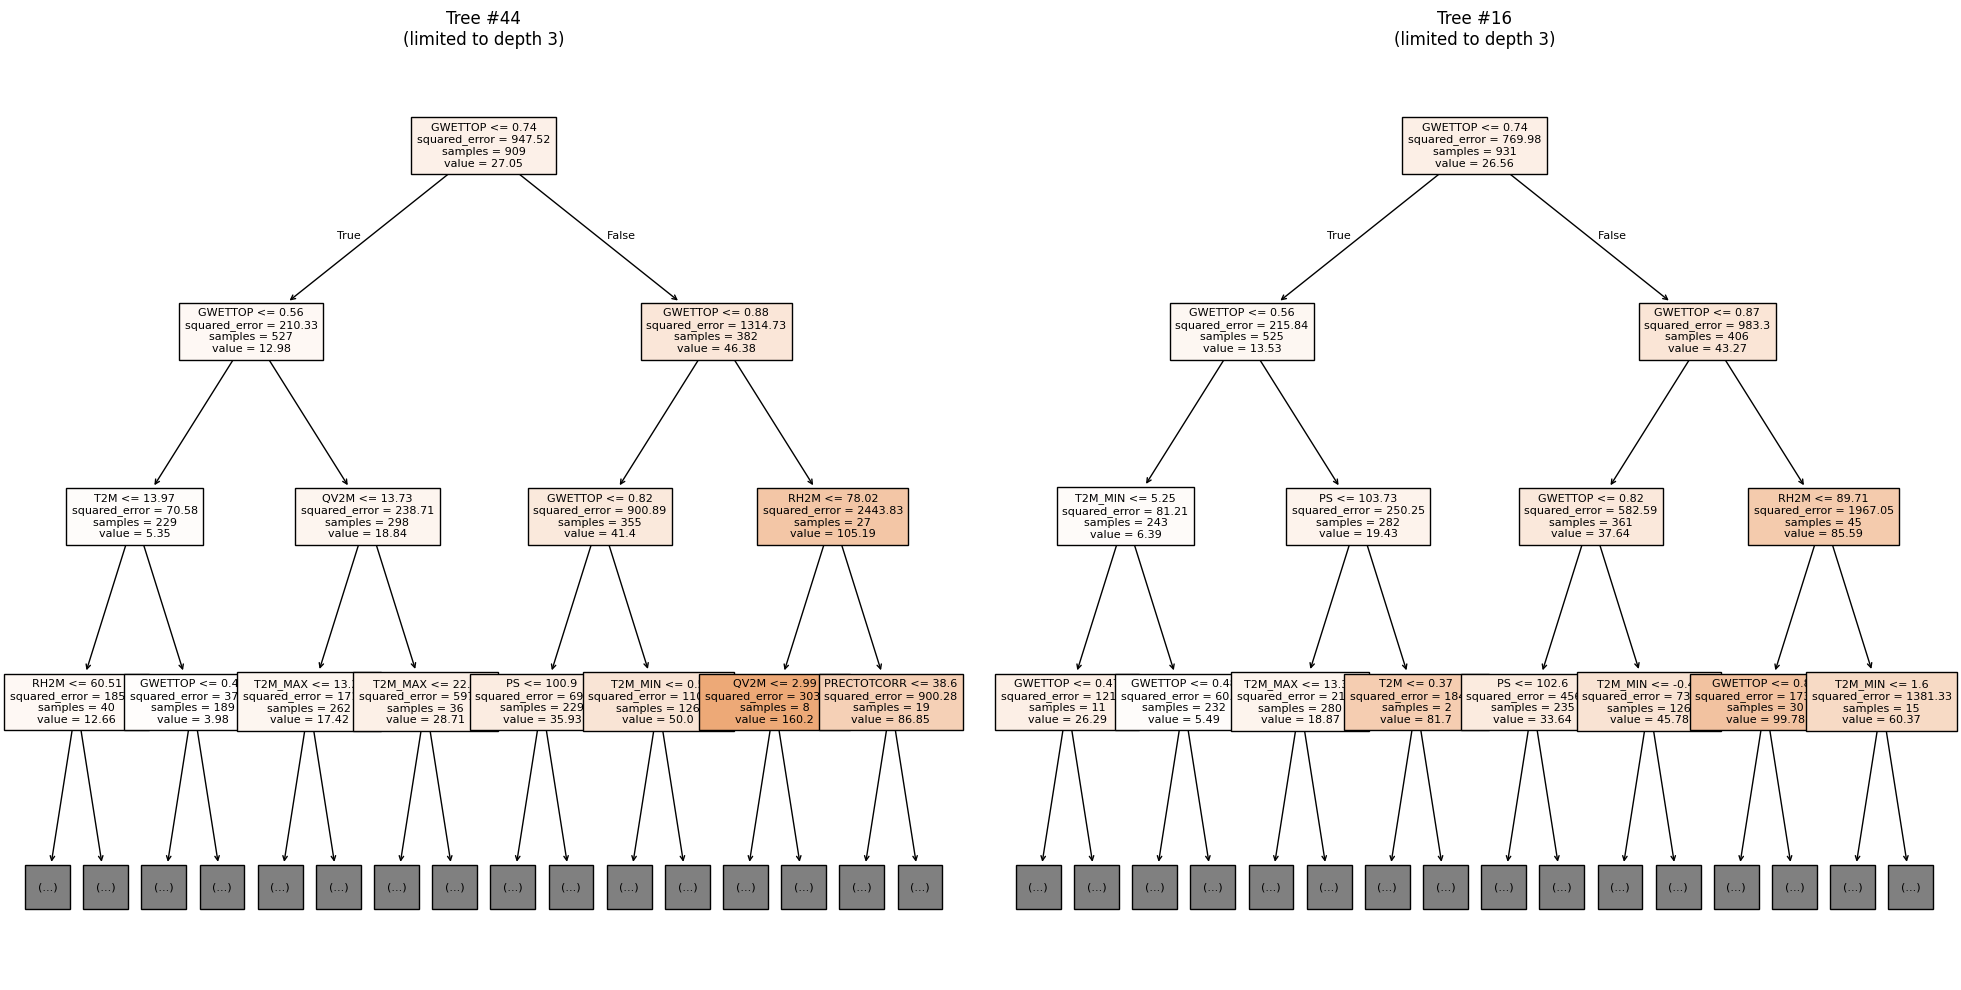

Tree #44 - Total depth: 25, Total nodes: 1789
Tree #16 - Total depth: 26, Total nodes: 1839


In [ ]:
# Random Forest Model
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y, train_size=0.8, shuffle =True)
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor()
rf_model.fit(X_train, Y_train)
y_pred= rf_model.predict(X_test)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rf_model_all = RandomForestRegressor(bootstrap=True, n_jobs=-1, random_state=15, max_features='sqrt', min_samples_leaf=2)
rf_model_all.fit(X_train, Y_train)
y2_model= rf_model_all.predict(X_test)
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
def plot_sample_trees(rf_model, feature_names, n_trees=2, figsize=(20, 10), max_depth_to_plot=3):
    n_estimators = len(rf_model.estimators_)
    if n_trees > n_estimators:
        n_trees = n_estimators
    tree_indices = np.random.choice(range(n_estimators), size=n_trees, replace=False)
    fig, axes = plt.subplots(1, n_trees, figsize=figsize)
    if n_trees == 1:
        axes = [axes]
    for i, tree_idx in enumerate(tree_indices):
        estimator = rf_model.estimators_[tree_idx]
        tree.plot_tree(estimator,feature_names=feature_names,filled=True,max_depth=max_depth_to_plot,ax=axes[i],fontsize=8,precision=2)
        axes[i].set_title(f"Tree #{tree_idx}\n(limited to depth {max_depth_to_plot})")
    plt.tight_layout()
    plt.show()
    for tree_idx in tree_indices:
        estimator = rf_model.estimators_[tree_idx]
        print(f"Tree #{tree_idx} - Total depth: {estimator.get_depth()}, "
              f"Total nodes: {estimator.tree_.node_count}")
plot_sample_trees(rf_model, features)

In [ ]:
# R squared, MSE, RMSE, and MAE for Random Forest Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
import numpy as np
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rf_model_all.fit(X_train, Y_train)
y2_model= rf_model_all.predict(X_test)
mse = mean_squared_error(Y_test, y2_model)
rmse = root_mean_squared_error(Y_test, y2_model)
r2 = r2_score(Y_test, y2_model)
mae = mean_absolute_error(Y_test, y2_model)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error (MSE): 548.1051
Root Mean Squared Error (RMSE): 23.4116
R-squared Score: 0.434
Mean Absolute Error (MAE): 13.3812


In [ ]:
# Comparing R2 scores for using testing and training data
print(f"RF model score on training data: {rf_model.score(X_train, Y_train):.2f}")
print(f"RF model score on testing data: {rf_model.score(X_test, Y_test):.2f}")

RF model score on training data: 0.92
RF model score on testing data: 0.43


RF model score on training data: 0.92
RF model score on testing data: 0.43


Text(0.5, 0, 'Relative Importance')

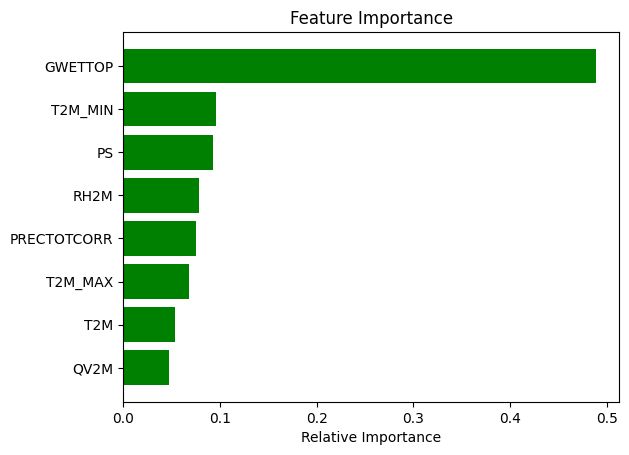

In [ ]:
# Comparing R2 scores, feature importance plot
print(f"RF model score on training data: {rf_model.score(X_train, Y_train):.2f}")
print(f"RF model score on testing data: {rf_model.score(X_test, Y_test):.2f}")
# get our importance scores
rf_importances = rf_model.feature_importances_
indices = np.argsort(rf_importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), rf_importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), np.array(features)[indices])
plt.xlabel('Relative Importance')

In [ ]:
from IPython.display import HTML
display(HTML("<div style='height:990px;'></div>"))

In [ ]:
from IPython.display import HTML
display(HTML("<div style='height:990px;'></div>"))

In [ ]:
from IPython.display import HTML
display(HTML("<div style='height:990px;'></div>"))